In [1]:
!pip install kneed
!pip install minisom
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kneed import KneeLocator
from sklearn.preprocessing import normalize

In [2]:
data=pd.read_excel('Clustering_marketing_campaign.xlsx')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0


In [3]:
pd.set_option('display.max_columns', None)
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
data_sample = data.copy()

In [5]:
data.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)

In [6]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
dtype: int64

In [7]:
data["Income"].fillna(data["Income"].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_16960\4068938060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Income"].fillna(data["Income"].mean(), inplace=True)


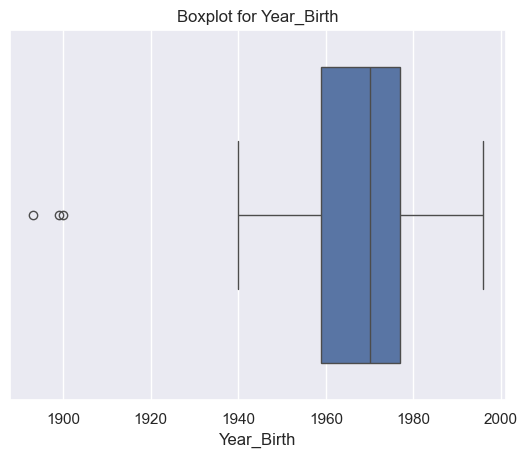

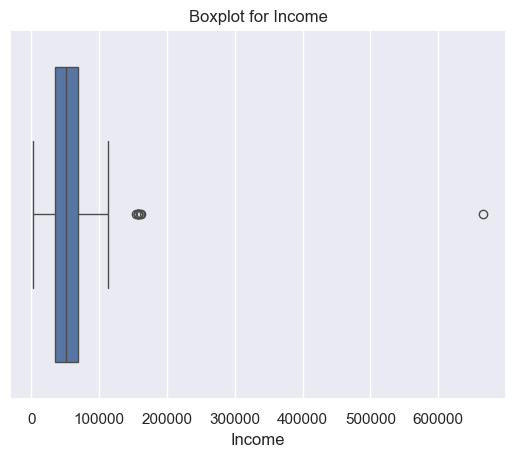

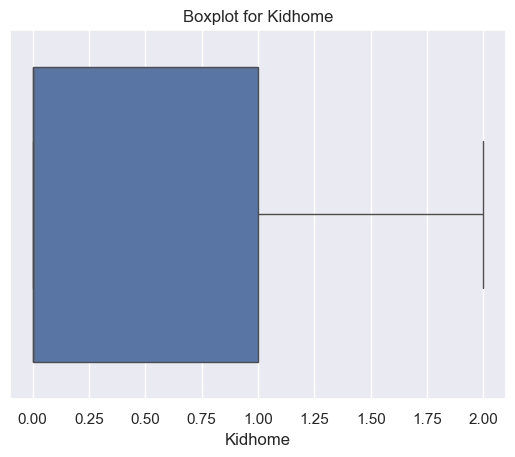

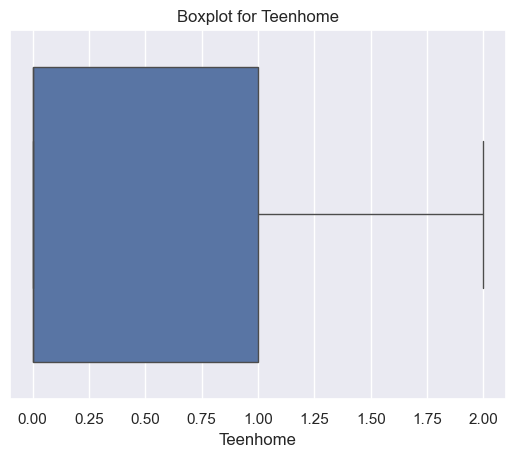

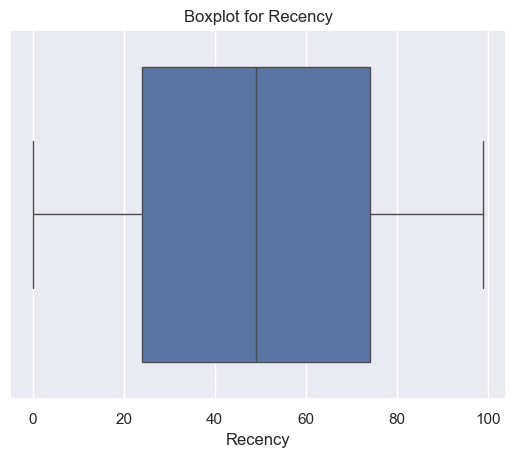

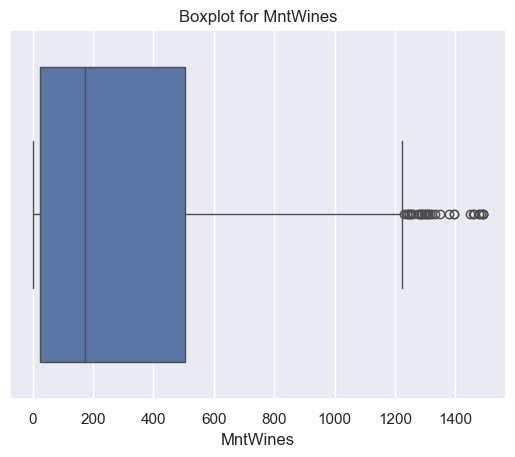

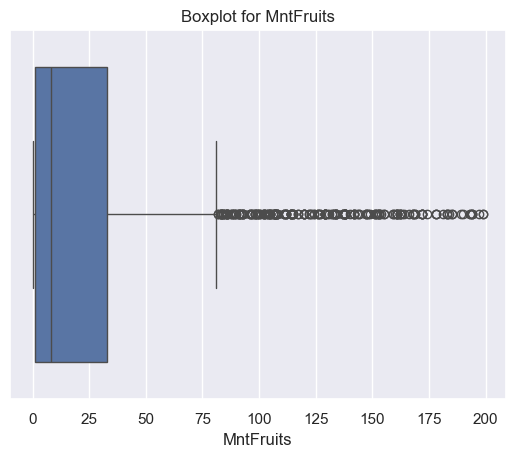

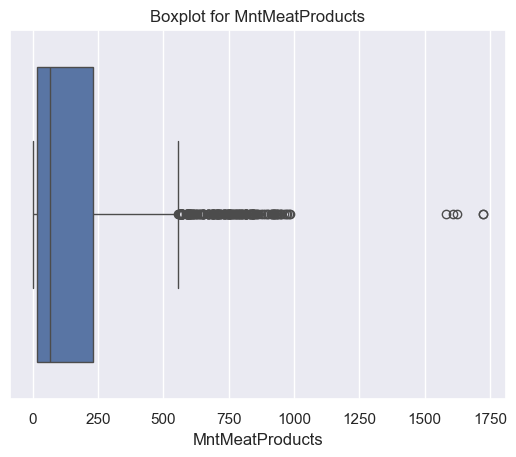

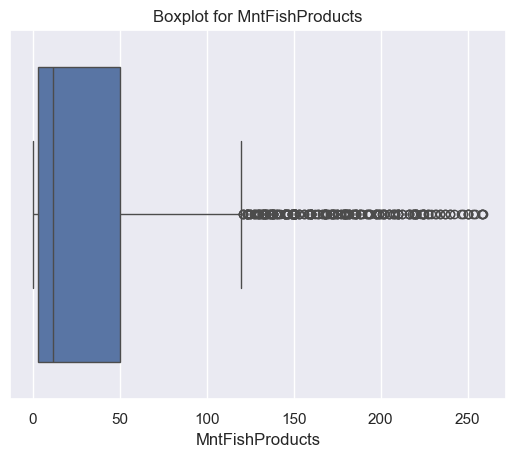

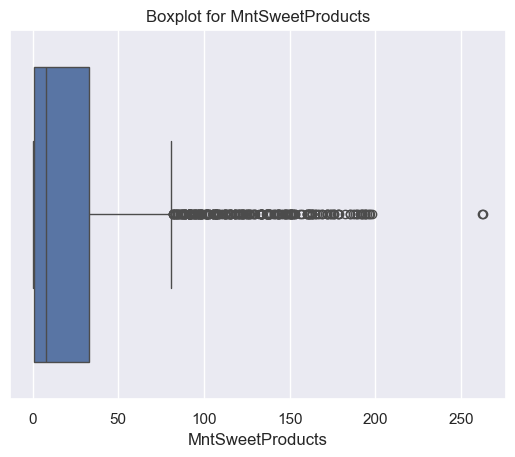

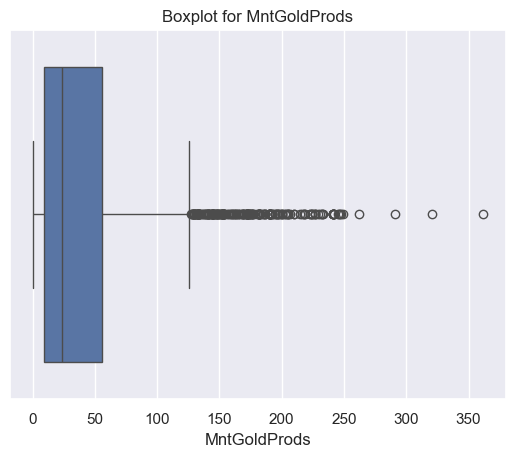

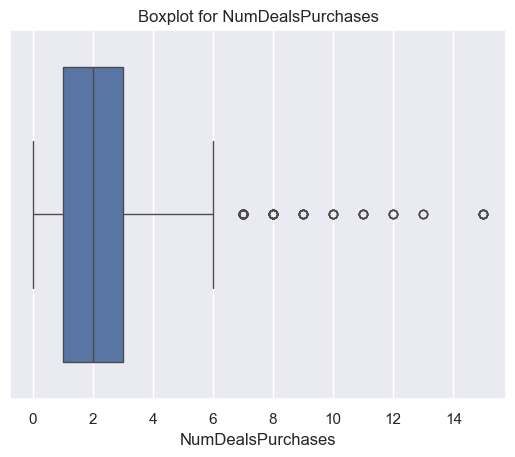

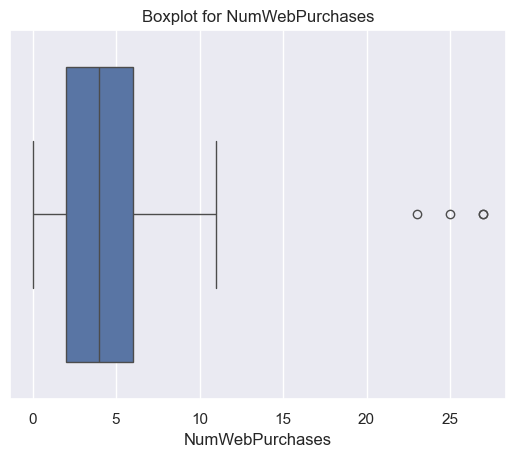

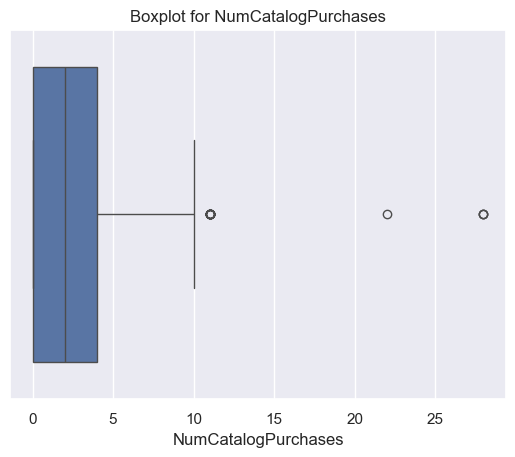

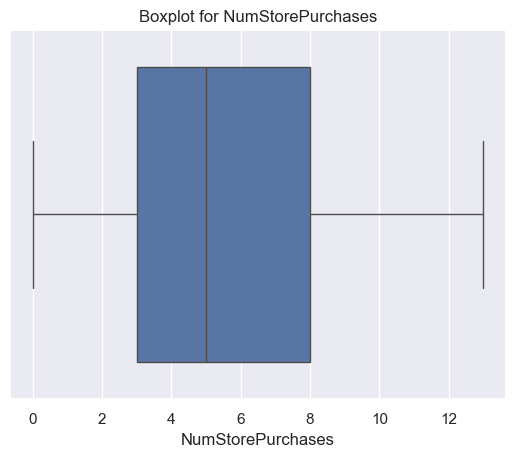

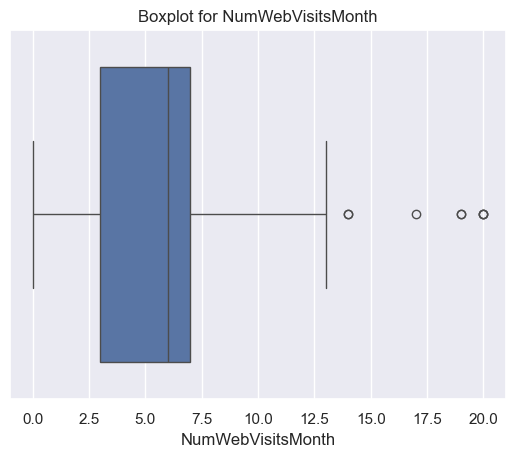

In [8]:
exclude_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']

for i in data.columns:
    if data[i].dtype != object and i not in exclude_cols:
        sns.boxplot(data=data, x=i)
        plt.title(f'Boxplot for {i}')
        plt.show()


In [9]:
q1=data.quantile(0.25, numeric_only=True)
q3=data.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

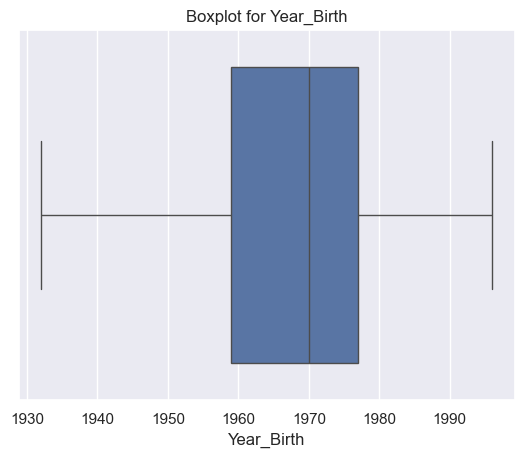

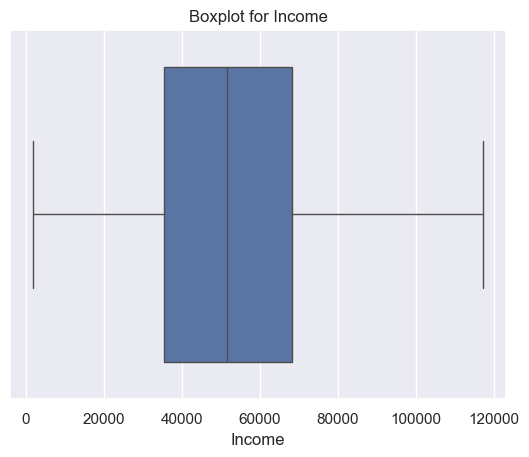

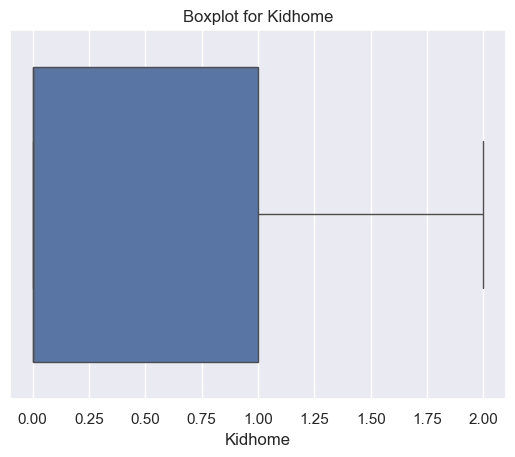

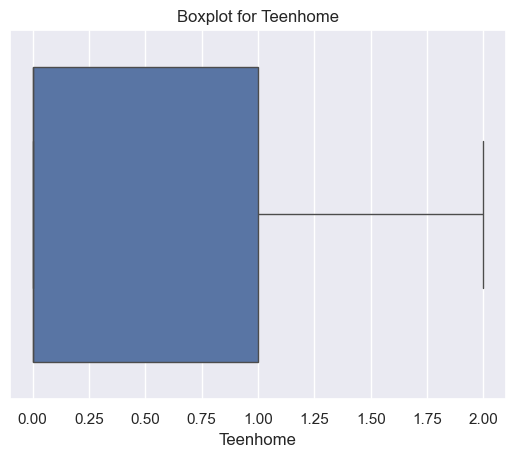

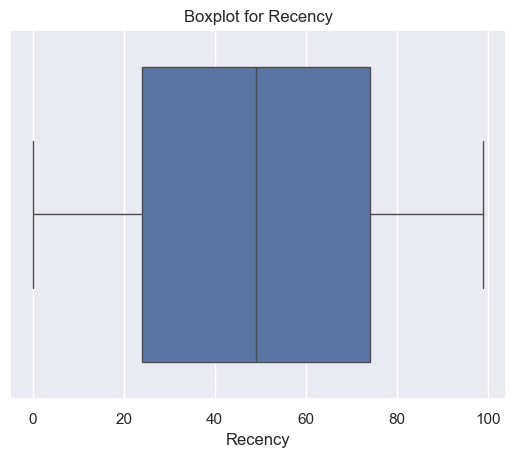

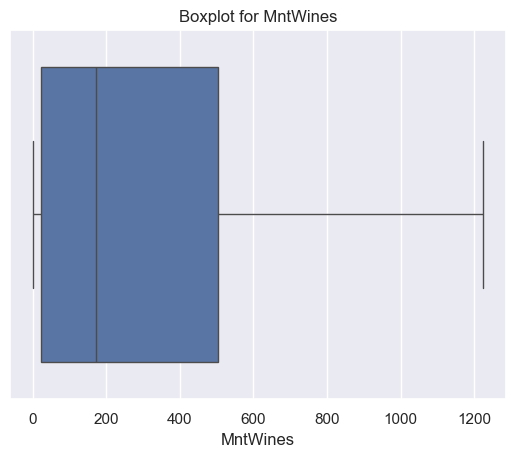

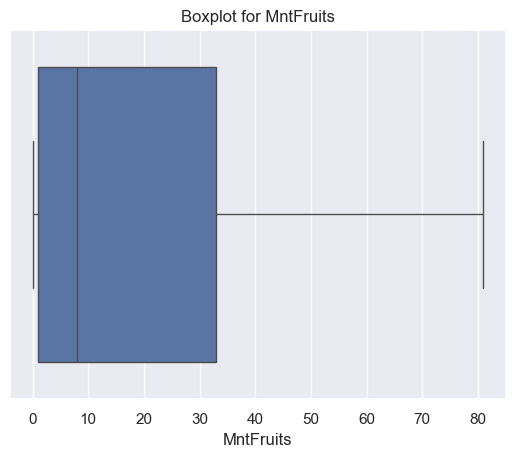

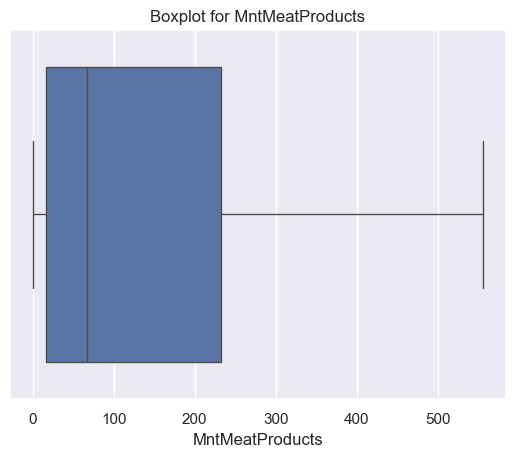

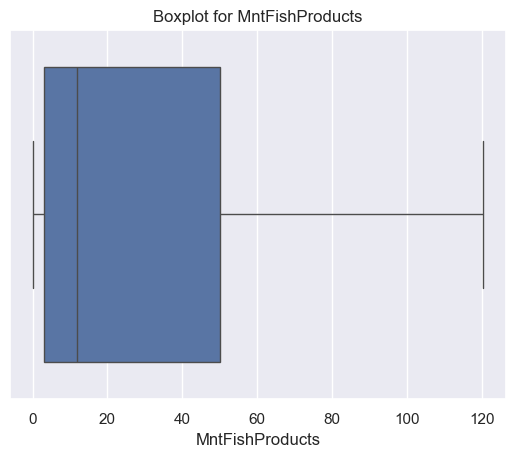

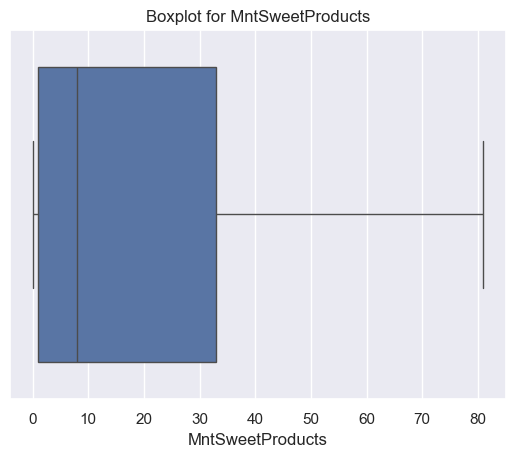

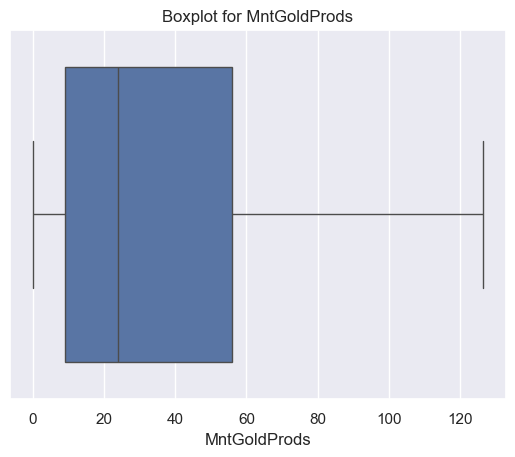

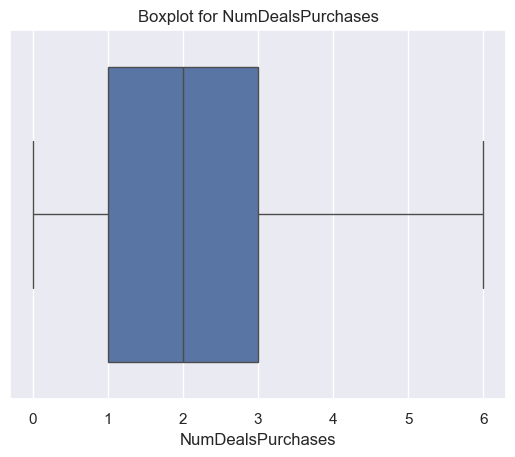

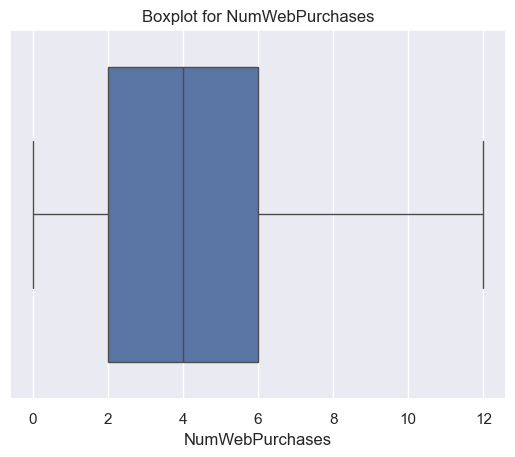

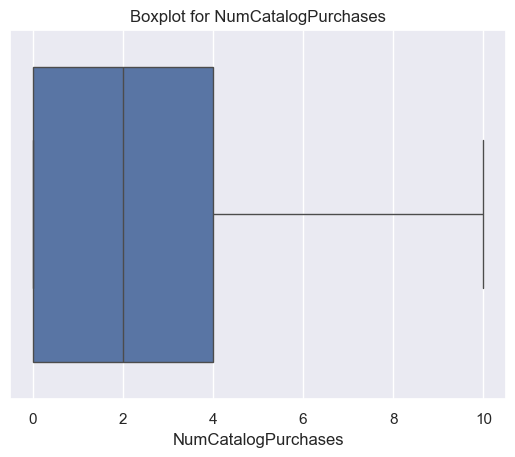

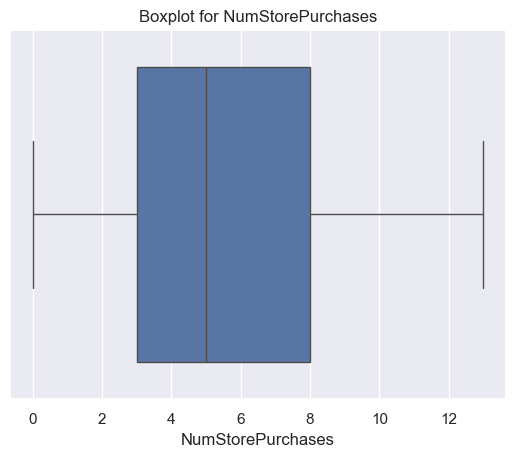

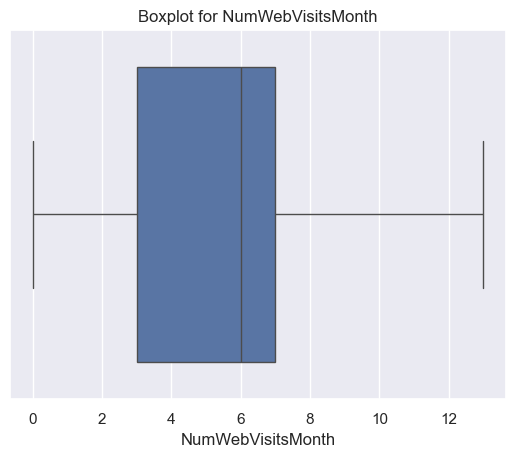

In [10]:
exclude_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']

for i in data.columns:
    if data[i].dtype != object and i not in exclude_cols:
        data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
        data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])
        sns.boxplot(data=data, x=data[i])
        plt.title(f'Boxplot for {i}')
        plt.show()


In [11]:
le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,17,2,4,1171,0,0,58,517,79,413,99,80,87,3,8,10,4,7,0,0,0,0,0,0
1,14,2,4,832,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,25,2,5,1568,0,0,26,371,49,126,92,21,42,1,8,2,10,4,0,0,0,0,0,0
3,44,2,5,241,1,0,26,11,4,20,9,3,5,2,2,0,4,6,0,0,0,0,0,0
4,41,4,3,1174,1,0,94,161,43,117,42,27,15,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,27,2,3,1254,0,1,46,551,43,177,38,80,123,2,9,3,4,5,0,0,0,0,0,0
2236,6,4,5,1340,2,1,56,356,0,30,0,0,8,6,8,2,5,7,0,0,0,1,0,0
2237,41,2,2,1134,0,0,91,653,48,206,28,12,24,1,2,3,13,6,0,1,0,0,0,0
2238,16,3,5,1492,0,1,8,372,30,203,70,30,61,2,6,5,10,3,0,0,0,0,0,0


In [12]:
data.corr(method='spearman')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
Year_Birth,1.000000,-0.182948,-0.044269,-0.215890,0.259344,-0.385526,-0.020663,-0.234220,-0.025290,-0.113743,-0.031672,0.003026,-0.076645,-0.086662,-0.164416,-0.178772,-0.167646,0.131076,0.064105,-0.066724,0.014872,-0.006182,-0.013470,-0.008618
Education,-0.182948,1.000000,0.002889,0.141125,-0.051483,0.118069,-0.017119,0.231662,-0.158275,0.066267,-0.162644,-0.163182,-0.132537,0.025446,0.091808,0.087360,0.086485,-0.053534,0.005390,0.053768,0.031099,-0.013457,0.018417,-0.050234
Marital_Status,-0.044269,0.002889,1.000000,0.005396,-0.015721,-0.011463,0.016791,0.012893,0.003621,0.025713,0.025615,0.014727,0.017304,-0.033818,-0.006082,0.022347,-0.002703,-0.034506,-0.025035,0.010957,0.012951,-0.015425,0.019123,-0.003933
Income,-0.215890,0.141125,0.005396,1.000000,-0.557006,0.046112,0.007945,0.827203,0.578439,0.812988,0.574371,0.563382,0.503501,-0.193876,0.570916,0.788181,0.728679,-0.640123,-0.015309,0.221736,0.393584,0.327664,0.104922,-0.030973
Kidhome,0.259344,-0.051483,-0.015721,-0.557006,1.000000,-0.046348,0.006299,-0.580316,-0.449577,-0.550809,-0.453111,-0.438643,-0.426083,0.259642,-0.421880,-0.597539,-0.556584,0.481647,0.020317,-0.164250,-0.210944,-0.180201,-0.083703,0.039710
Teenhome,-0.385526,0.118069,-0.011463,0.046112,-0.046348,1.000000,0.009889,0.111420,-0.200180,-0.127416,-0.229662,-0.197047,-0.021595,0.480748,0.146136,-0.043715,0.077442,0.111630,-0.045317,0.037432,-0.199925,-0.145173,-0.017590,0.000983
Recency,-0.020663,-0.017119,0.016791,0.007945,0.006299,0.009889,1.000000,0.018645,0.025696,0.027304,0.013102,0.024316,0.018008,0.008302,-0.003936,0.030725,0.005543,-0.021903,-0.032695,0.018808,0.000631,-0.019224,-0.001898,0.013276
MntWines,-0.234220,0.231662,0.012893,0.827203,-0.580316,0.111420,0.018645,1.000000,0.517706,0.824347,0.525268,0.506193,0.575856,0.057113,0.740195,0.823637,0.806963,-0.389053,0.034663,0.310655,0.365679,0.304071,0.138057,-0.038034
MntFruits,-0.025290,-0.158275,0.003621,0.578439,-0.449577,-0.200180,0.025696,0.517706,1.000000,0.713547,0.704545,0.692807,0.568569,-0.108105,0.472064,0.634245,0.583766,-0.442412,0.008358,0.029239,0.235120,0.174021,0.002436,-0.011985
MntMeatProducts,-0.113743,0.066267,0.025713,0.812988,-0.550809,-0.127416,0.027304,0.824347,0.713547,1.000000,0.726709,0.697137,0.639351,-0.032525,0.679576,0.851684,0.780297,-0.491819,0.008639,0.142592,0.330808,0.284190,0.062006,-0.024540


In [13]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_std, columns=data.columns)
data_scaled

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,-1.010804,-0.350141,0.251004,0.335565,-0.825218,-0.929894,0.307039,1.183634,2.159486,2.042410,2.126043,2.141407,1.233161,0.509888,1.488353,2.697675,-0.550785,0.735095,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
1,-1.266406,-0.350141,0.251004,-0.259678,1.032559,0.906934,-0.383664,-0.976324,-0.764614,-0.884615,-0.761701,-0.763464,-0.847799,-0.140168,-1.156408,-0.594004,-1.166125,-0.125204,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
2,-0.329201,-0.350141,1.180340,1.032650,-0.825218,-0.929894,-0.798086,0.560405,1.034832,-0.021610,1.917649,-0.028054,0.077073,-0.790225,1.488353,-0.228262,1.295237,-0.555354,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
3,1.289608,-0.350141,1.180340,-1.297404,1.032559,-0.929894,-0.798086,-0.976324,-0.652149,-0.783932,-0.553307,-0.689923,-0.873489,-0.140168,-0.778585,-0.959746,-0.550785,0.304945,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
4,1.034006,1.428354,-0.678332,0.340833,1.032559,-0.929894,1.550305,-0.336020,0.809901,-0.086336,0.429121,0.192569,-0.616581,1.810001,0.354884,0.137480,0.064556,-0.125204,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.158800,-0.350141,-0.678332,0.481304,-0.825218,0.906934,-0.107383,1.328769,0.809901,0.345167,0.310039,2.141407,2.158033,-0.140168,1.866176,0.137480,-0.550785,-0.125204,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
2236,-1.948009,1.428354,1.180340,0.632309,2.890335,0.906934,0.237969,0.496374,-0.802102,-0.712014,-0.821242,-0.800235,-0.796417,2.460058,1.488353,-0.228262,-0.243114,0.735095,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282
2237,1.034006,-0.350141,-1.607669,0.270598,-0.825218,-0.929894,1.446700,1.764176,0.997344,0.553726,0.012334,-0.358989,-0.385363,-0.790225,-0.778585,0.137480,2.218248,0.304945,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282
2238,-1.096005,0.539106,1.180340,0.899203,-0.825218,0.906934,-1.419719,0.564673,0.322551,0.532151,1.262697,0.302881,0.565199,-0.140168,0.732707,0.868964,1.295237,-0.985504,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282


Text(0.5, 1.0, 'Visualization of raw data')

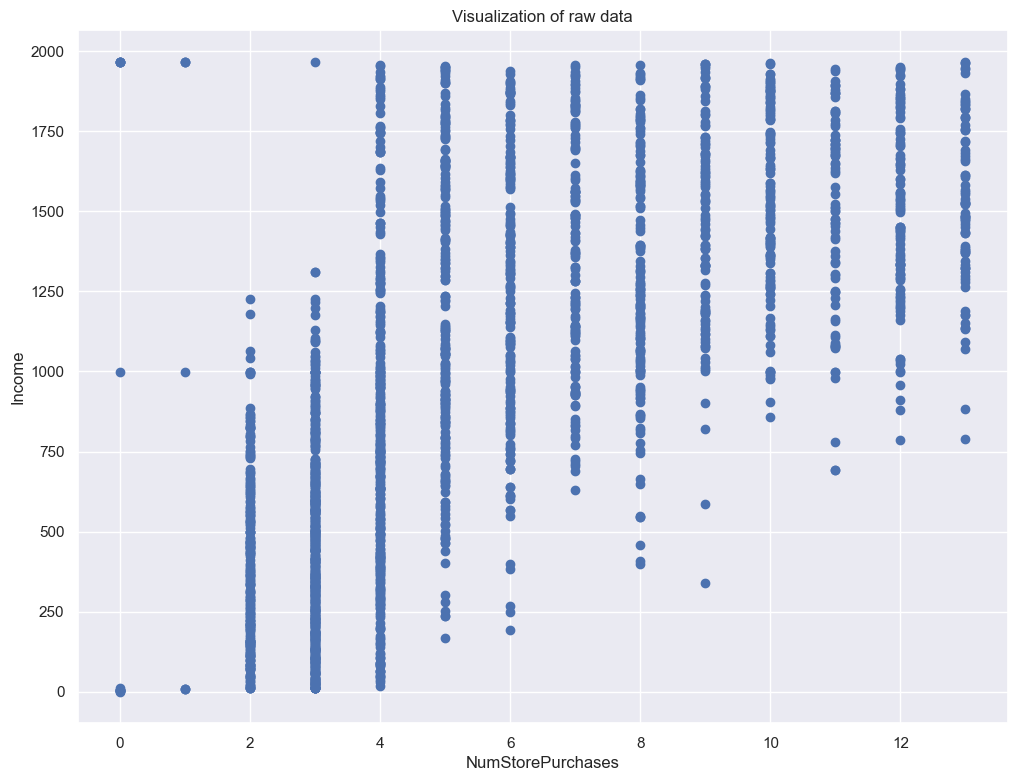

In [14]:
plt.figure(figsize = (12, 9))
plt.scatter(data['NumStorePurchases'], data['Income'])
plt.xlabel('NumStorePurchases')
plt.ylabel('Income')
plt.title('Visualization of raw data')

In [15]:
wcss = []
silhouette_scores = []

for i in range(1, 26):
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(data_scaled)
    
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
    print(f"Cluster {i}: WCSS = {wcss_iter:.4f}")  # Print WCSS first
    
    if i > 1:  # Calculate silhouette score only if k >= 2
        y = kmeans.predict(data_scaled)
        silhouette_avg = silhouette_score(data_scaled, y)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score = {silhouette_avg:.4f}")  
    else:
        print(" (Silhouette Score not applicable for k=1)")  


Cluster 1: WCSS = 53760.0000
 (Silhouette Score not applicable for k=1)
Cluster 2: WCSS = 40490.2997
Silhouette Score = 0.2603
Cluster 3: WCSS = 36794.0769
Silhouette Score = 0.1884
Cluster 4: WCSS = 35330.2203
Silhouette Score = 0.1051
Cluster 5: WCSS = 33439.6635
Silhouette Score = 0.1115
Cluster 6: WCSS = 32631.1949
Silhouette Score = 0.1083
Cluster 7: WCSS = 30541.9359
Silhouette Score = 0.1136
Cluster 8: WCSS = 28872.1799
Silhouette Score = 0.1175
Cluster 9: WCSS = 26807.8365
Silhouette Score = 0.1218
Cluster 10: WCSS = 26342.7213
Silhouette Score = 0.0976
Cluster 11: WCSS = 25403.9548
Silhouette Score = 0.1023
Cluster 12: WCSS = 24546.7202
Silhouette Score = 0.1231
Cluster 13: WCSS = 24188.6216
Silhouette Score = 0.1217
Cluster 14: WCSS = 24184.5083
Silhouette Score = 0.1094
Cluster 15: WCSS = 23198.3445
Silhouette Score = 0.1178
Cluster 16: WCSS = 22607.5846
Silhouette Score = 0.1176
Cluster 17: WCSS = 22392.0566
Silhouette Score = 0.1168
Cluster 18: WCSS = 21980.5723
Silhouette

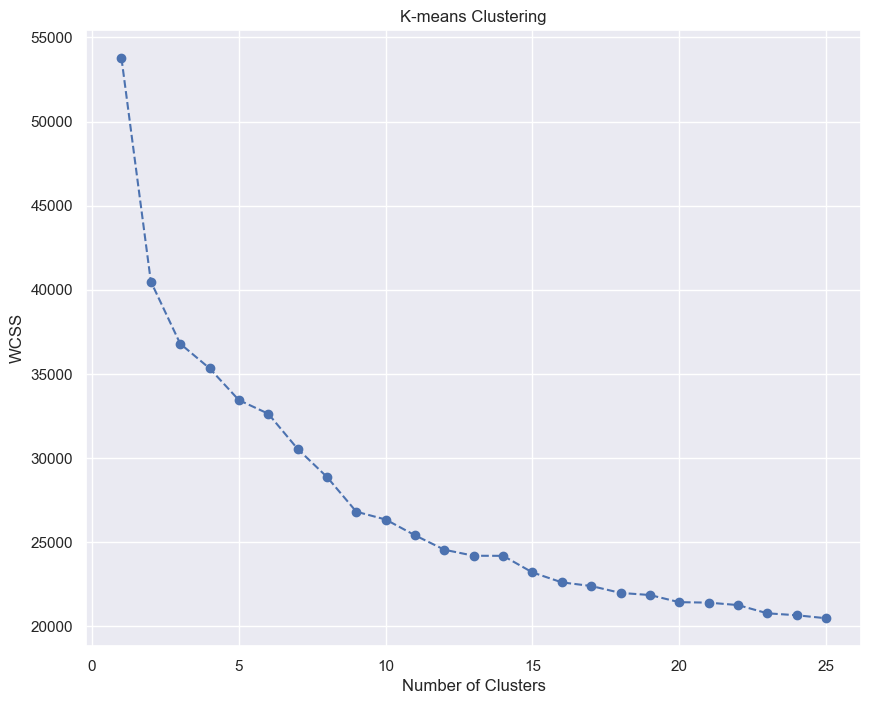

In [16]:
plt.figure(figsize = (10,8))
plt.plot(range(1, len(wcss)+1), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

The optimal number of clusters (elbow point) is: 9


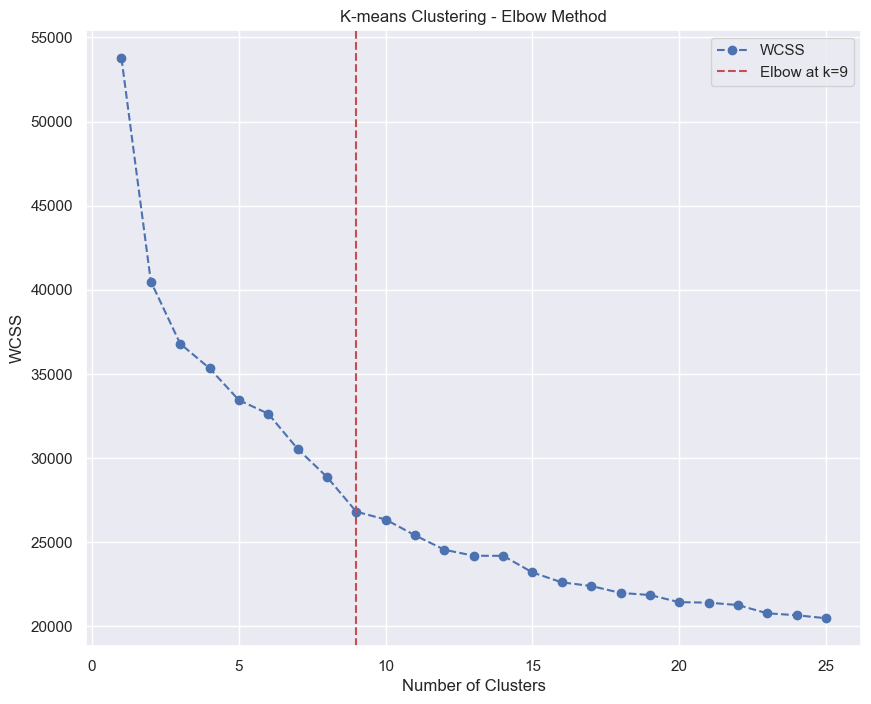

In [17]:
# Automatically find the "elbow"
knee_locator = KneeLocator(range(1, len(wcss)+1), wcss, curve="convex", direction="decreasing")

#Convex Curve: The plot is shaped like a gradually flattening downward curve.
#WCSS is always decreasing as we increase the number of clusters.

# Get the elbow point
optimal_k = knee_locator.elbow
print(f"The optimal number of clusters (elbow point) is: {optimal_k}")

# Plot with the elbow point marked
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(wcss)+1), wcss, marker="o", linestyle="--", label="WCSS")
plt.axvline(optimal_k, linestyle="--", color="r", label=f"Elbow at k={optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering - Elbow Method")
plt.legend()
plt.show()


In [18]:
kmeans = KMeans(9)
kmeans.fit(data_scaled)

KMeans(n_clusters=9)

In [19]:
data['Segments'] = kmeans.predict(data_scaled)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments
0,17,2,4,1171,0,0,58,517,79,413,99,80,87,3,8,10,4,7,0,0,0,0,0,0,0
1,14,2,4,832,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,5
2,25,2,5,1568,0,0,26,371,49,126,92,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,44,2,5,241,1,0,26,11,4,20,9,3,5,2,2,0,4,6,0,0,0,0,0,0,1
4,41,4,3,1174,1,0,94,161,43,117,42,27,15,5,5,3,6,5,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,27,2,3,1254,0,1,46,551,43,177,38,80,123,2,9,3,4,5,0,0,0,0,0,0,0
2236,6,4,5,1340,2,1,56,356,0,30,0,0,8,6,8,2,5,7,0,0,0,1,0,0,3
2237,41,2,2,1134,0,0,91,653,48,206,28,12,24,1,2,3,13,6,0,1,0,0,0,0,4
2238,16,3,5,1492,0,1,8,372,30,203,70,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [20]:
df_segm_analysis = data.groupby(['Segments'], as_index=False).mean()
df_segm_analysis

,Segments,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,0,28.067568,1.954955,3.792793,1319.959459,0.175676,0.779279,50.247748,348.031532,56.391892,203.828829,65.545045,56.180180,70.324324,2.842342,6.743243,4.108108,9.139640,4.801802,0.045045,0.000000,0.000000,0.000000,0.0,0.018018
1,1,38.374771,2.049360,3.647166,348.692870,0.859232,0.027422,47.553931,25.157221,5.835466,22.745887,7.570384,5.956124,15.835466,1.756856,2.073126,0.475320,2.985375,6.872029,0.091408,0.000000,0.000000,0.000000,0.0,0.010969
2,2,28.037500,2.400000,3.809375,1644.956250,0.018750,0.046875,50.459375,415.159375,51.437500,342.184375,70.965625,50.612500,63.015625,1.065625,4.428125,6.037500,8.165625,2.328125,0.053125,0.034375,0.000000,0.162500,0.0,0.003125
3,3,28.635897,2.528205,3.651282,834.071795,0.866667,0.861538,46.343590,197.892308,9.066667,82.276923,13.543590,9.964103,43.430769,5.148718,5.528205,1.641026,5.323077,7.184615,0.102564,0.000000,0.000000,0.025641,0.0,0.005128
4,4,25.105263,2.684211,3.705263,1205.800000,0.200000,0.884211,52.347368,448.431579,12.873684,104.252632,14.642105,10.410526,35.736842,3.094737,5.778947,2.821053,7.473684,6.073684,0.000000,1.000000,0.084211,0.105263,0.0,0.000000
5,5,22.682984,2.508159,3.827506,677.911422,0.634033,0.939394,51.275058,48.906760,3.771562,19.892774,5.088578,4.128205,12.575758,1.906760,1.895105,0.568765,3.377622,5.571096,0.030303,0.000000,0.000000,0.000000,0.0,0.013986
6,6,22.196226,2.996226,3.641509,1228.079245,0.041509,0.962264,47.871698,422.988679,15.615094,135.622642,19.200000,15.818868,56.245283,2.773585,6.471698,3.607547,8.003774,5.298113,0.101887,0.000000,0.003774,0.026415,0.0,0.007547
7,7,28.133333,2.600000,3.900000,1493.166667,0.066667,0.433333,48.666667,570.533333,20.566667,189.333333,32.633333,25.800000,60.200000,1.666667,4.900000,5.166667,8.166667,5.166667,0.233333,0.733333,0.566667,0.433333,1.0,0.000000
8,8,29.452555,2.503650,3.729927,1799.620438,0.051095,0.058394,47.722628,596.445255,46.656934,333.416058,59.189781,52.218978,65.335766,0.941606,5.445255,6.065693,8.262774,2.591241,0.138686,0.284672,1.000000,0.416058,0.0,0.007299


In [21]:
df_segm_analysis['data count'] = data[['Segments','Complain']].groupby(['Segments']).count()
df_segm_analysis['data proportion'] = df_segm_analysis['data count'] / df_segm_analysis['data count'].sum()

df_segm_analysis

,Segments,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,data count,data proportion
0,0,28.067568,1.954955,3.792793,1319.959459,0.175676,0.779279,50.247748,348.031532,56.391892,203.828829,65.545045,56.180180,70.324324,2.842342,6.743243,4.108108,9.139640,4.801802,0.045045,0.000000,0.000000,0.000000,0.0,0.018018,222,0.099107
1,1,38.374771,2.049360,3.647166,348.692870,0.859232,0.027422,47.553931,25.157221,5.835466,22.745887,7.570384,5.956124,15.835466,1.756856,2.073126,0.475320,2.985375,6.872029,0.091408,0.000000,0.000000,0.000000,0.0,0.010969,547,0.244196
2,2,28.037500,2.400000,3.809375,1644.956250,0.018750,0.046875,50.459375,415.159375,51.437500,342.184375,70.965625,50.612500,63.015625,1.065625,4.428125,6.037500,8.165625,2.328125,0.053125,0.034375,0.000000,0.162500,0.0,0.003125,320,0.142857
3,3,28.635897,2.528205,3.651282,834.071795,0.866667,0.861538,46.343590,197.892308,9.066667,82.276923,13.543590,9.964103,43.430769,5.148718,5.528205,1.641026,5.323077,7.184615,0.102564,0.000000,0.000000,0.025641,0.0,0.005128,195,0.087054
4,4,25.105263,2.684211,3.705263,1205.800000,0.200000,0.884211,52.347368,448.431579,12.873684,104.252632,14.642105,10.410526,35.736842,3.094737,5.778947,2.821053,7.473684,6.073684,0.000000,1.000000,0.084211,0.105263,0.0,0.000000,95,0.042411
5,5,22.682984,2.508159,3.827506,677.911422,0.634033,0.939394,51.275058,48.906760,3.771562,19.892774,5.088578,4.128205,12.575758,1.906760,1.895105,0.568765,3.377622,5.571096,0.030303,0.000000,0.000000,0.000000,0.0,0.013986,429,0.191518
6,6,22.196226,2.996226,3.641509,1228.079245,0.041509,0.962264,47.871698,422.988679,15.615094,135.622642,19.200000,15.818868,56.245283,2.773585,6.471698,3.607547,8.003774,5.298113,0.101887,0.000000,0.003774,0.026415,0.0,0.007547,265,0.118304
7,7,28.133333,2.600000,3.900000,1493.166667,0.066667,0.433333,48.666667,570.533333,20.566667,189.333333,32.633333,25.800000,60.200000,1.666667,4.900000,5.166667,8.166667,5.166667,0.233333,0.733333,0.566667,0.433333,1.0,0.000000,30,0.013393
8,8,29.452555,2.503650,3.729927,1799.620438,0.051095,0.058394,47.722628,596.445255,46.656934,333.416058,59.189781,52.218978,65.335766,0.941606,5.445255,6.065693,8.262774,2.591241,0.138686,0.284672,1.000000,0.416058,0.0,0.007299,137,0.061161


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3656109793.py:3: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=data['Income'], y=data['Complain'], hue=data['Segments'],


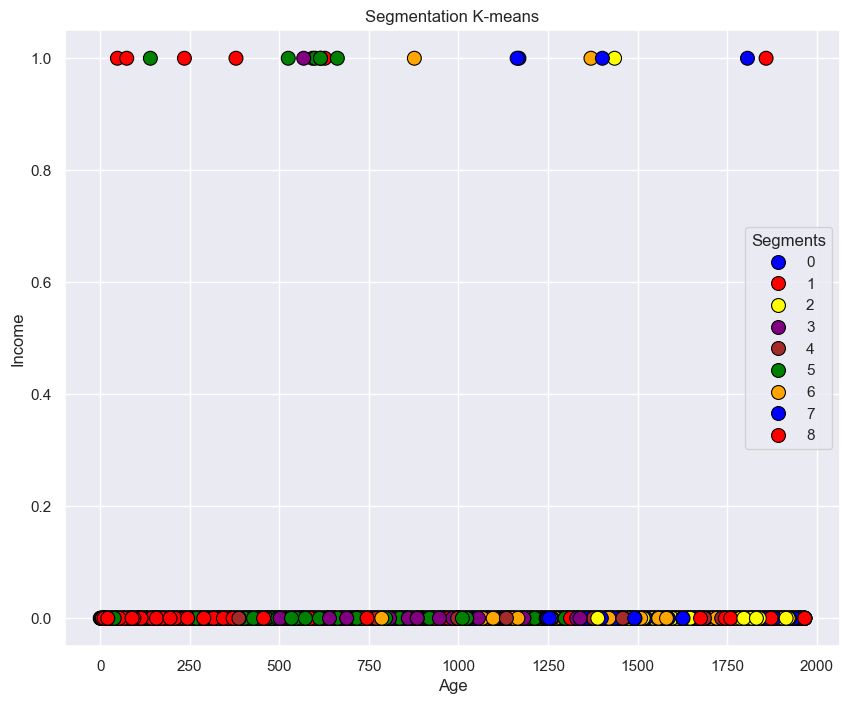

In [22]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=data['Income'], y=data['Complain'], hue=data['Segments'], 
                palette=['blue', 'red', 'yellow','purple', 'brown', 'green', 'orange'], s=100, edgecolor="black")

plt.title('Segmentation K-means')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Segments")
plt.show()


In [23]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(data_scaled)

PCA()

In [24]:
pca.explained_variance_ratio_

array([0.3075197 , 0.08950331, 0.07186338, 0.0583458 , 0.04540522,
       0.04258037, 0.04176462, 0.04097279, 0.03819556, 0.03404198,
       0.02882915, 0.02607199, 0.0241865 , 0.02341105, 0.02125534,
       0.01888871, 0.01564875, 0.01507839, 0.01342795, 0.01188299,
       0.01164875, 0.00832244, 0.00638775, 0.00476751])

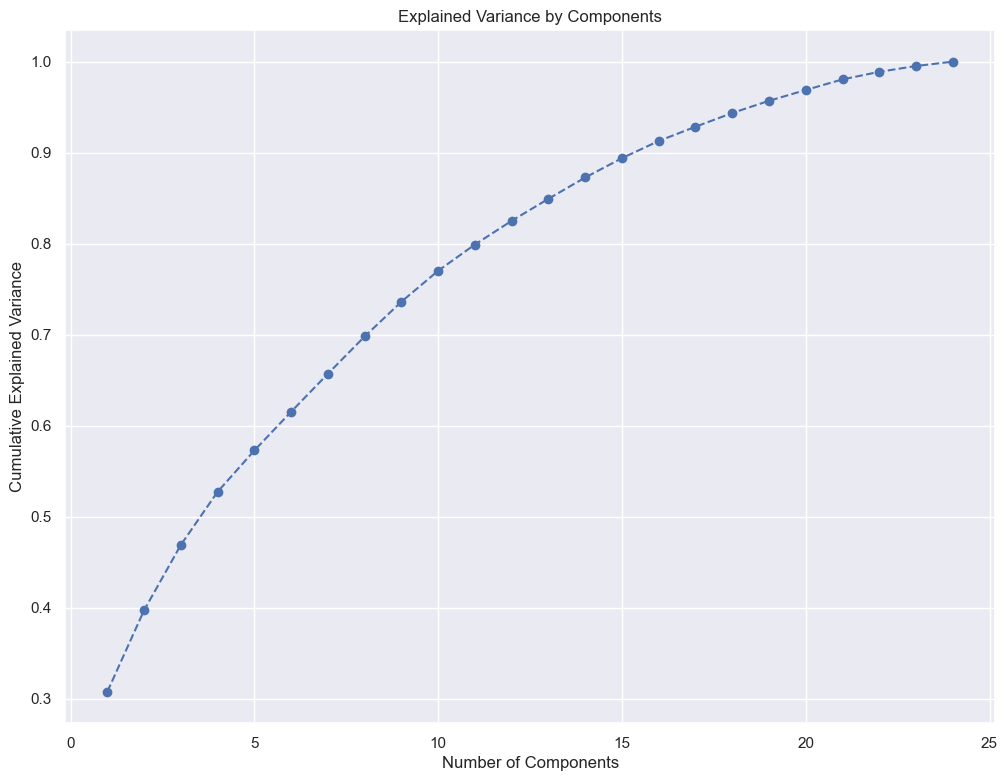

In [25]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 

# BEST PRACTICE around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,25), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [26]:
pca = PCA(n_components = 12)

In [27]:
pca.fit(data_scaled)

PCA(n_components=12)

In [28]:
pca.components_

array([[-6.03971502e-02,  1.77972791e-02,  9.27297991e-03,
         3.25668609e-01, -2.43360751e-01, -4.27934572e-02,
         6.34789647e-03,  3.06457978e-01,  2.76837619e-01,
         3.24913540e-01,  2.85581449e-01,  2.81311475e-01,
         2.28366225e-01, -5.57967900e-02,  2.14500437e-01,
         3.12908288e-01,  2.79639145e-01, -2.36189978e-01,
         1.20399903e-02,  8.28330859e-02,  1.66894748e-01,
         1.46645384e-01,  4.75320421e-02, -1.34756596e-02],
       [-3.21242723e-01,  2.06936747e-01,  1.22848778e-03,
         6.82192885e-02, -4.95880227e-02,  5.16753493e-01,
         1.18851281e-02,  1.92160019e-01, -1.11941103e-01,
        -9.07228604e-02, -1.38415332e-01, -1.18642234e-01,
         8.30747792e-02,  4.84626107e-01,  3.49379765e-01,
         7.38386582e-04,  1.69643195e-01,  2.14769916e-01,
        -3.71993210e-02,  1.38686404e-01, -1.34974891e-01,
        -1.00773508e-01,  3.00498272e-02, -1.17902437e-02],
       [-4.14689462e-03,  1.78935925e-01,  6.04805454e

In [29]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns[:-1].values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5',
                                   'Component 6', 'Component 7', 'Component 8', 'Component 9', 'Component 10', 'Component 11', 'Component 12'])
df_pca_comp

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
Component 1,-0.060397,0.017797,0.009273,0.325669,-0.243361,-0.042793,0.006348,0.306458,0.276838,0.324914,0.285581,0.281311,0.228366,-0.055797,0.214500,0.312908,0.279639,-0.236190,0.012040,0.082833,0.166895,0.146645,0.047532,-0.013476
Component 2,-0.321243,0.206937,0.001228,0.068219,-0.049588,0.516753,0.011885,0.192160,-0.111941,-0.090723,-0.138415,-0.118642,0.083075,0.484626,0.349380,0.000738,0.169643,0.214770,-0.037199,0.138686,-0.134975,-0.100774,0.030050,-0.011790
Component 3,-0.004147,0.178936,0.006048,0.040424,0.004645,-0.054066,-0.020829,0.150304,-0.220068,-0.051553,-0.191453,-0.177094,-0.155057,-0.138367,-0.062790,0.003352,-0.070689,0.041320,0.079407,0.499901,0.420224,0.366834,0.445117,-0.043405
Component 4,0.435257,-0.360022,-0.139866,-0.137265,0.226563,-0.152319,-0.047199,0.044698,0.069205,-0.003184,0.057675,0.077352,0.264578,0.336230,0.258581,0.009482,0.005576,0.380088,0.331057,0.037517,0.066507,0.148060,0.130028,0.030018
Component 5,-0.070404,0.425969,-0.221211,0.033250,-0.021281,-0.003662,-0.392072,0.042224,-0.044417,0.024190,-0.065065,-0.079990,0.014862,-0.086519,0.007391,0.103990,-0.089989,-0.030605,0.648791,-0.325388,0.006955,0.045307,-0.125341,-0.148884
Component 6,-0.247983,-0.100909,0.322532,-0.016036,-0.021212,0.097691,0.306239,-0.037876,-0.016829,-0.015507,0.001357,-0.014166,0.074975,-0.052563,-0.053842,0.070458,-0.108216,-0.030418,0.414531,-0.124843,0.048499,0.035219,0.106149,0.697808
Component 7,-0.020858,-0.024953,0.812840,-0.057662,-0.006097,-0.032252,-0.003762,-0.020154,-0.018189,-0.001665,0.039034,0.014951,0.120291,0.017659,0.012238,0.014598,-0.059558,0.049767,0.164048,-0.052050,-0.028918,-0.037464,0.092002,-0.519458
Component 8,0.074111,0.216197,-0.222166,0.008276,0.080249,-0.040678,0.859575,0.041898,-0.013034,0.034043,-0.047576,-0.007713,0.012256,0.013374,-0.008601,0.062094,-0.042593,-0.007259,0.163121,-0.070813,0.019549,-0.010383,-0.079556,-0.318436
Component 9,0.326369,0.537491,0.314793,0.027476,0.267070,-0.275881,-0.008200,0.148818,-0.004147,0.125913,-0.027456,-0.007925,-0.175987,0.130322,0.148582,0.017612,0.086299,0.114754,-0.178839,-0.001891,0.086417,-0.030354,-0.298057,0.313412
Component 10,0.240950,0.224911,-0.048503,-0.027728,-0.153933,-0.135921,0.003507,0.028998,0.060619,-0.003553,-0.015014,-0.029287,0.056912,-0.092990,-0.009813,0.014022,0.146848,-0.006362,0.051046,0.011730,-0.256683,-0.583476,0.624598,0.086389


In [30]:
scores_pca = pca.transform(data_scaled)

scores_pca

array([[ 4.21531955,  0.06049186, -1.89472657, ...,  0.06051662,
         0.3929933 , -1.96116284],
       [-2.56764568,  0.16949476,  0.11862154, ..., -0.78675511,
         0.7491102 ,  0.38437545],
       [ 2.27398981, -0.33553852, -0.9908764 , ...,  0.43759124,
        -0.58428472, -0.81604112],
       ...,
       [ 1.7329656 , -0.2767185 ,  1.5806767 , ...,  1.1749579 ,
        -2.36958084,  0.32022966],
       [ 2.45826163,  1.10921777, -0.85698696, ...,  0.15267665,
         0.18270183,  0.10926735],
       [-2.01565304,  1.4736438 ,  0.24671125, ..., -0.29914136,
         0.98120511, -0.28315873]])

In [31]:
scores_pca.shape

(2240, 12)

In [32]:
pca_df = pd.DataFrame(scores_pca, columns=[f'Variable_{i+1}' for i in range(scores_pca.shape[1])])

pca_df


,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12
0,4.215320,0.060492,-1.894727,1.034802,-0.309244,0.271041,0.607712,0.211897,0.146314,0.060517,0.392993,-1.961163
1,-2.567646,0.169495,0.118622,-1.316522,0.046793,0.367505,0.176451,-0.506945,-0.855203,-0.786755,0.749110,0.384375
2,2.273990,-0.335539,-0.990876,-0.371928,-0.281133,-0.227880,0.929836,-1.225799,0.358195,0.437591,-0.584285,-0.816041
3,-2.800127,-1.408293,0.050084,0.387335,-0.330197,-0.388241,0.987151,-0.878208,0.915771,0.139528,0.022050,0.257909
4,-0.055402,0.209918,-0.668837,0.679652,-0.249906,-0.602217,-0.617941,1.974964,1.772441,0.525662,1.259367,0.147870
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.452870,1.031305,-1.355989,0.841718,-0.026998,-0.219771,-0.253774,-0.049278,-0.839317,0.090373,-0.401581,-0.632271
2236,-0.972979,3.137052,1.649055,0.453098,0.376736,0.504170,0.729324,0.330044,1.713205,-3.371421,2.944899,-1.251048
2237,1.732966,-0.276719,1.580677,0.293806,-1.782735,-1.305459,-1.721511,1.302991,0.114964,1.174958,-2.369581,0.320230
2238,2.458262,1.109218,-0.856987,-1.321771,0.518254,-0.005078,0.921321,-1.551185,0.025755,0.152677,0.182702,0.109267


In [33]:
wcss_pca = []
silhouette_scores_pca = []

for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)  
    kmeans_pca.fit(pca_df)
    
    wcss_iter = kmeans_pca.inertia_
    wcss_pca.append(wcss_iter)
    
    print(f"Cluster {i}: WCSS = {wcss_iter:.4f}")  # Print WCSS first
    
    if i > 1:  # Calculate silhouette score only if k >= 2
        y = kmeans_pca.predict(pca_df)
        silhouette_avg = silhouette_score(pca_df, y)
        silhouette_scores_pca.append(silhouette_avg)
        print(f"Silhouette Score = {silhouette_avg:.4f}")  # Append silhouette score to output
    else:
        print(" (Silhouette Score not applicable for k=1)")  # Indicate skipping silhouette score


Cluster 1: WCSS = 44357.0465
 (Silhouette Score not applicable for k=1)
Cluster 2: WCSS = 31096.4999
Silhouette Score = 0.3008
Cluster 3: WCSS = 27440.6837
Silhouette Score = 0.2258
Cluster 4: WCSS = 25993.7815
Silhouette Score = 0.1508
Cluster 5: WCSS = 23757.9910
Silhouette Score = 0.1585
Cluster 6: WCSS = 22875.9315
Silhouette Score = 0.1377
Cluster 7: WCSS = 21816.8594
Silhouette Score = 0.1446
Cluster 8: WCSS = 20080.8254
Silhouette Score = 0.1492
Cluster 9: WCSS = 19288.3552
Silhouette Score = 0.1448


The optimal number of clusters (elbow point) is: 3


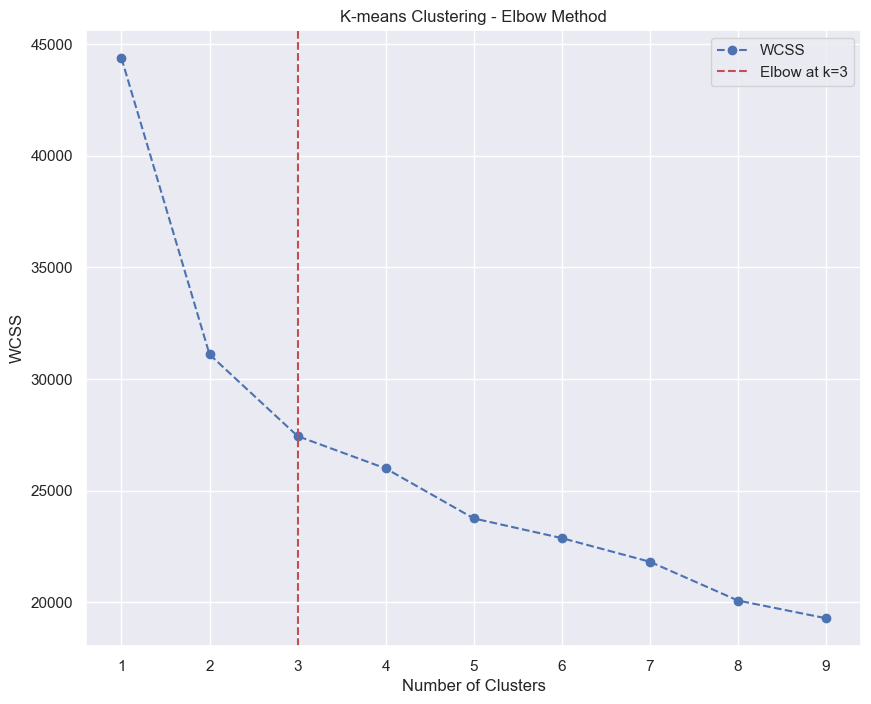

In [34]:
knee_locator = KneeLocator(range(1, len(wcss_pca)+1), wcss_pca, curve="convex", direction="decreasing")

optimal_k = knee_locator.elbow
print(f"The optimal number of clusters (elbow point) is: {optimal_k}")

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(wcss_pca)+1), wcss_pca, marker="o", linestyle="--", label="WCSS")
plt.axvline(optimal_k, linestyle="--", color="r", label=f"Elbow at k={optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering - Elbow Method")
plt.legend()
plt.show()


In [35]:
kmeans_pca = KMeans(3)
kmeans_pca.fit(pca_df)

KMeans(n_clusters=3)

In [36]:
data['Segments_pca'] = kmeans_pca.predict(pca_df)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments,Segments_pca
0,17,2,4,1171,0,0,58,517,79,413,99,80,87,3,8,10,4,7,0,0,0,0,0,0,0,1
1,14,2,4,832,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,5,0
2,25,2,5,1568,0,0,26,371,49,126,92,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1
3,44,2,5,241,1,0,26,11,4,20,9,3,5,2,2,0,4,6,0,0,0,0,0,0,1,0
4,41,4,3,1174,1,0,94,161,43,117,42,27,15,5,5,3,6,5,0,0,0,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,27,2,3,1254,0,1,46,551,43,177,38,80,123,2,9,3,4,5,0,0,0,0,0,0,0,2
2236,6,4,5,1340,2,1,56,356,0,30,0,0,8,6,8,2,5,7,0,0,0,1,0,0,3,2
2237,41,2,2,1134,0,0,91,653,48,206,28,12,24,1,2,3,13,6,0,1,0,0,0,0,4,1
2238,16,3,5,1492,0,1,8,372,30,203,70,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1


In [37]:
data = pd.concat([data,pca_df], axis=1)

data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments,Segments_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12
0,17,2,4,1171,0,0,58,517,79,413,99,80,87,3,8,10,4,7,0,0,0,0,0,0,0,1,4.215320,0.060492,-1.894727,1.034802,-0.309244,0.271041,0.607712,0.211897,0.146314,0.060517,0.392993,-1.961163
1,14,2,4,832,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,5,0,-2.567646,0.169495,0.118622,-1.316522,0.046793,0.367505,0.176451,-0.506945,-0.855203,-0.786755,0.749110,0.384375
2,25,2,5,1568,0,0,26,371,49,126,92,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1,2.273990,-0.335539,-0.990876,-0.371928,-0.281133,-0.227880,0.929836,-1.225799,0.358195,0.437591,-0.584285,-0.816041
3,44,2,5,241,1,0,26,11,4,20,9,3,5,2,2,0,4,6,0,0,0,0,0,0,1,0,-2.800127,-1.408293,0.050084,0.387335,-0.330197,-0.388241,0.987151,-0.878208,0.915771,0.139528,0.022050,0.257909
4,41,4,3,1174,1,0,94,161,43,117,42,27,15,5,5,3,6,5,0,0,0,0,0,0,3,2,-0.055402,0.209918,-0.668837,0.679652,-0.249906,-0.602217,-0.617941,1.974964,1.772441,0.525662,1.259367,0.147870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,27,2,3,1254,0,1,46,551,43,177,38,80,123,2,9,3,4,5,0,0,0,0,0,0,0,2,2.452870,1.031305,-1.355989,0.841718,-0.026998,-0.219771,-0.253774,-0.049278,-0.839317,0.090373,-0.401581,-0.632271
2236,6,4,5,1340,2,1,56,356,0,30,0,0,8,6,8,2,5,7,0,0,0,1,0,0,3,2,-0.972979,3.137052,1.649055,0.453098,0.376736,0.504170,0.729324,0.330044,1.713205,-3.371421,2.944899,-1.251048
2237,41,2,2,1134,0,0,91,653,48,206,28,12,24,1,2,3,13,6,0,1,0,0,0,0,4,1,1.732966,-0.276719,1.580677,0.293806,-1.782735,-1.305459,-1.721511,1.302991,0.114964,1.174958,-2.369581,0.320230
2238,16,3,5,1492,0,1,8,372,30,203,70,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,2.458262,1.109218,-0.856987,-1.321771,0.518254,-0.005078,0.921321,-1.551185,0.025755,0.152677,0.182702,0.109267


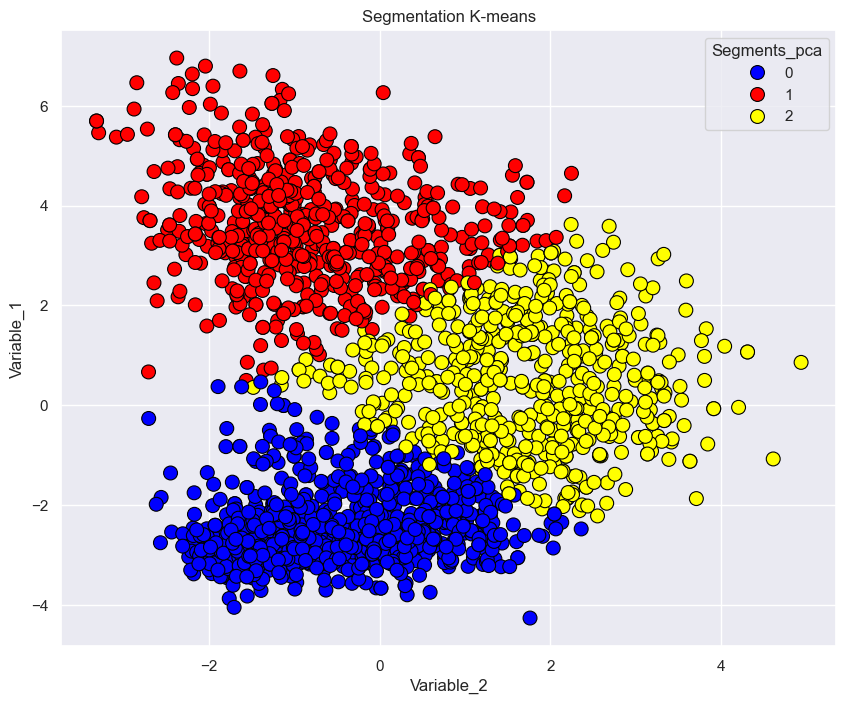

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.scatterplot(x=data['Variable_2'], y=data['Variable_1'], hue=data['Segments_pca'], palette=['blue', 'red', 'yellow'], s=100, edgecolor="black")

plt.title('Segmentation K-means')
plt.xlabel("Variable_2")
plt.ylabel("Variable_1")
plt.legend(title="Segments_pca")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\1622751462.py:3: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=data['Education'], y=data['Income'], hue=data['Segments'], palette=['blue', 'red', 'yellow', 'black', 'orange', 'green', 'purple'], s=100, edgecolor="black")


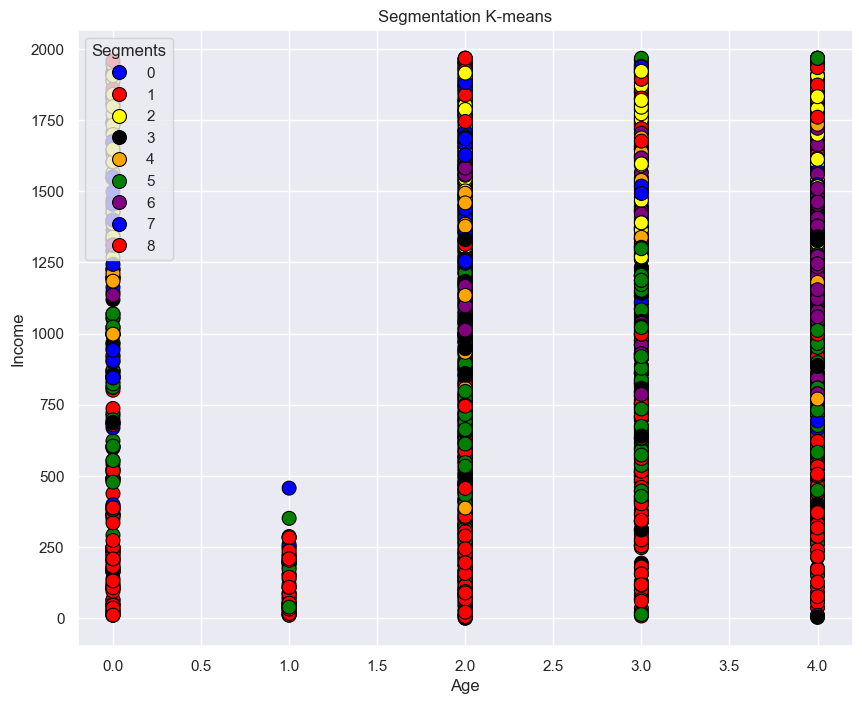

In [39]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=data['Education'], y=data['Income'], hue=data['Segments'], palette=['blue', 'red', 'yellow', 'black', 'orange', 'green', 'purple'], s=100, edgecolor="black")

plt.title('Segmentation K-means')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Segments")
plt.show()


## Aglomerative

In [41]:
data_hyc = data.copy()

data_scaled2 = normalize(data_hyc)
data_scaled2 = pd.DataFrame(data_scaled2, columns=data_hyc.columns)
data_scaled2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments,Segments_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12
0,0.012522,0.001473,0.002946,0.862558,0.000000,0.0000,0.042723,0.380822,0.058191,0.304216,0.072923,0.058928,0.064084,0.002210,0.005893,0.007366,0.002946,0.005156,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000737,0.003105,0.000045,-0.001396,0.000762,-0.000228,0.000200,0.000448,0.000156,0.000108,0.000045,0.000289,-0.001445
1,0.016803,0.002400,0.004801,0.998608,0.001200,0.0012,0.045609,0.013203,0.001200,0.007201,0.002400,0.001200,0.007201,0.002400,0.001200,0.001200,0.002400,0.006001,0.0,0.0,0.0,0.0,0.0,0.0,0.006001,0.000000,-0.003082,0.000203,0.000142,-0.001580,0.000056,0.000441,0.000212,-0.000608,-0.001026,-0.000944,0.000899,0.000461
2,0.015425,0.001234,0.003085,0.967471,0.000000,0.0000,0.016042,0.228910,0.030233,0.077743,0.056765,0.012957,0.025914,0.000617,0.004936,0.001234,0.006170,0.002468,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000617,0.001403,-0.000207,-0.000611,-0.000229,-0.000173,-0.000141,0.000574,-0.000756,0.000221,0.000270,-0.000361,-0.000504
3,0.177499,0.008068,0.020170,0.972210,0.004034,0.0000,0.104886,0.044375,0.016136,0.080681,0.036307,0.012102,0.020170,0.008068,0.008068,0.000000,0.016136,0.024204,0.0,0.0,0.0,0.0,0.0,0.0,0.004034,0.000000,-0.011296,-0.005681,0.000202,0.001563,-0.001332,-0.001566,0.003982,-0.003543,0.003694,0.000563,0.000089,0.001040
4,0.034248,0.003341,0.002506,0.980672,0.000835,0.0000,0.078521,0.134487,0.035919,0.097733,0.035084,0.022554,0.012530,0.004177,0.004177,0.002506,0.005012,0.004177,0.0,0.0,0.0,0.0,0.0,0.0,0.002506,0.001671,-0.000046,0.000175,-0.000559,0.000568,-0.000209,-0.000503,-0.000516,0.001650,0.001481,0.000439,0.001052,0.000124


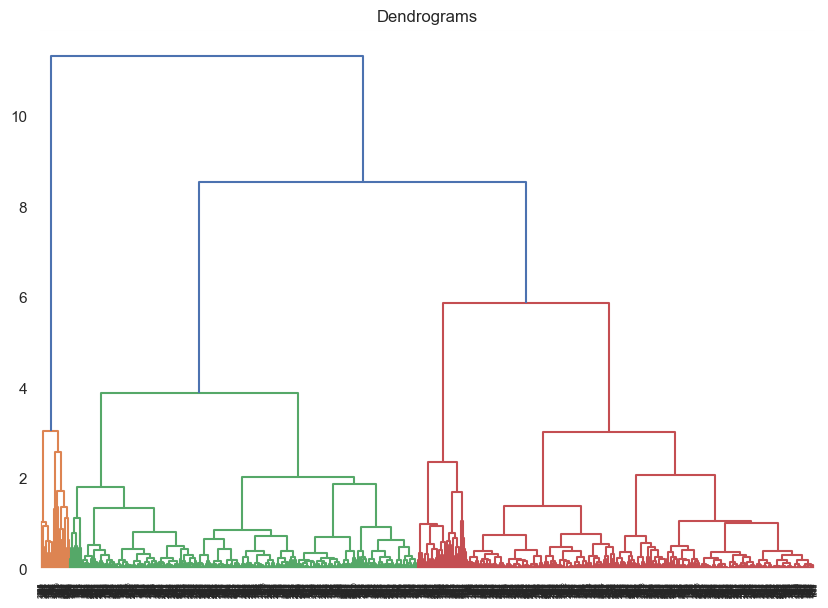

In [42]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(data_scaled2, method='ward'))

plt.show()

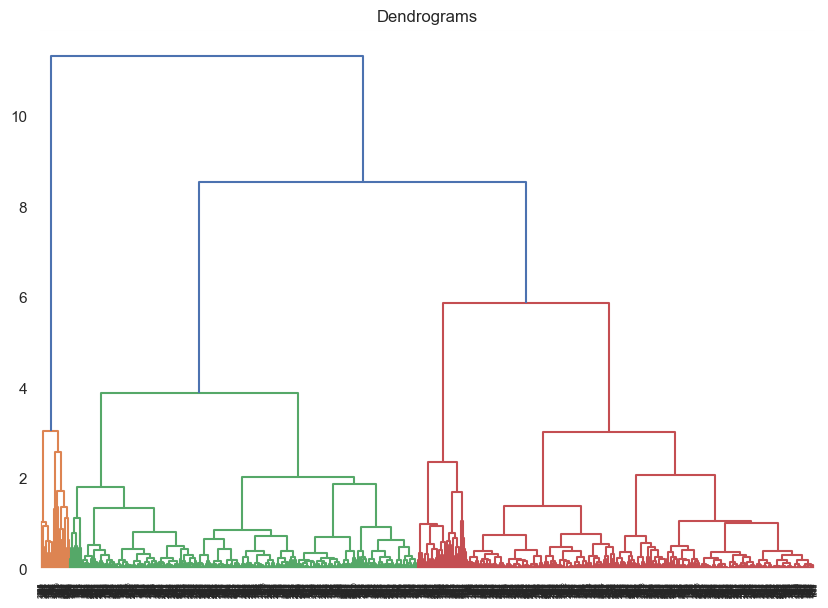

In [43]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled2, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.show()


In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  
y = cluster.fit_predict(data_scaled2)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
data_hyc['dependent_value'] = y

data_hyc

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments,Segments_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,dependent_value
0,17,2,4,1171,0,0,58,517,79,413,99,80,87,3,8,10,4,7,0,0,0,0,0,0,0,1,4.215320,0.060492,-1.894727,1.034802,-0.309244,0.271041,0.607712,0.211897,0.146314,0.060517,0.392993,-1.961163,0
1,14,2,4,832,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,5,0,-2.567646,0.169495,0.118622,-1.316522,0.046793,0.367505,0.176451,-0.506945,-0.855203,-0.786755,0.749110,0.384375,0
2,25,2,5,1568,0,0,26,371,49,126,92,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1,2.273990,-0.335539,-0.990876,-0.371928,-0.281133,-0.227880,0.929836,-1.225799,0.358195,0.437591,-0.584285,-0.816041,0
3,44,2,5,241,1,0,26,11,4,20,9,3,5,2,2,0,4,6,0,0,0,0,0,0,1,0,-2.800127,-1.408293,0.050084,0.387335,-0.330197,-0.388241,0.987151,-0.878208,0.915771,0.139528,0.022050,0.257909,0
4,41,4,3,1174,1,0,94,161,43,117,42,27,15,5,5,3,6,5,0,0,0,0,0,0,3,2,-0.055402,0.209918,-0.668837,0.679652,-0.249906,-0.602217,-0.617941,1.974964,1.772441,0.525662,1.259367,0.147870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,27,2,3,1254,0,1,46,551,43,177,38,80,123,2,9,3,4,5,0,0,0,0,0,0,0,2,2.452870,1.031305,-1.355989,0.841718,-0.026998,-0.219771,-0.253774,-0.049278,-0.839317,0.090373,-0.401581,-0.632271,0
2236,6,4,5,1340,2,1,56,356,0,30,0,0,8,6,8,2,5,7,0,0,0,1,0,0,3,2,-0.972979,3.137052,1.649055,0.453098,0.376736,0.504170,0.729324,0.330044,1.713205,-3.371421,2.944899,-1.251048,0
2237,41,2,2,1134,0,0,91,653,48,206,28,12,24,1,2,3,13,6,0,1,0,0,0,0,4,1,1.732966,-0.276719,1.580677,0.293806,-1.782735,-1.305459,-1.721511,1.302991,0.114964,1.174958,-2.369581,0.320230,0
2238,16,3,5,1492,0,1,8,372,30,203,70,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,2.458262,1.109218,-0.856987,-1.321771,0.518254,-0.005078,0.921321,-1.551185,0.025755,0.152677,0.182702,0.109267,0


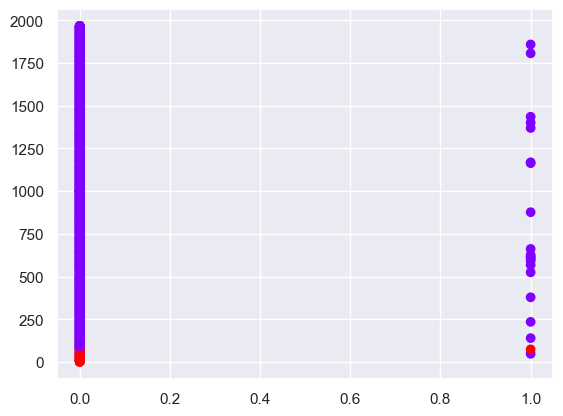

In [46]:
plt.scatter(data_hyc['Complain'],data_hyc['Income'],c=y,cmap='rainbow')
plt.xlim()
plt.ylim()
plt.show()

In [47]:
X = data_scaled2.copy()
y = data_hyc['dependent_value']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
def evaluate(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_prob=roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    
    return gini_prob

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

base_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Gini prob is 100.0


## SOM

In [52]:
som_data = data.copy()

In [53]:
inputs2 = som_data.drop(['Complain'], axis=1)
target2 = som_data['Complain']

In [54]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
inputs_scaled2= sc.fit_transform(inputs2)

In [55]:
import optuna
from minisom import MiniSom
from sklearn.metrics import silhouette_score

def objective(trial):

    x = trial.suggest_int("x", 10, 20)  # Grid size x
    y = trial.suggest_int("y", 10, 20)  # Grid size y
    sigma = trial.suggest_float("sigma", 0.1, 2.0, log=True)  # Spread of the neighborhood
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)  # Learning rate
    num_iteration = trial.suggest_int("num_iteration", 50, 500)  # Training iterations

    # Initialize SOM
    som = MiniSom(x=x, y=y, input_len=inputs_scaled2.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(inputs_scaled2)
    som.train_random(data=inputs_scaled2, num_iteration=num_iteration)

    
    # Assign each input to the closest SOM neuron
    labels = np.array([som.winner(x) for x in inputs_scaled2])
    print(labels)
    # Flatten the neuron indices for silhouette_score
    flattened_labels = [i[0] * y + i[1] for i in labels]
    
    # Evaluate clustering using silhouette score (higher is better)
    try:
        score = silhouette_score(inputs_scaled2, flattened_labels)
    except ValueError:
        score = -1  
    
    return score

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1)

# Display the best parameters
print("Best parameters:", study.best_params)
print("Best silhouette score:", study.best_value)


[I 2025-11-21 13:42:12,724] A new study created in memory with name: no-name-40f51f2e-8308-4bb3-b1d3-ec841d8d40ad
[I 2025-11-21 13:42:13,069] Trial 0 finished with value: 0.027373779009985295 and parameters: {'x': 20, 'y': 11, 'sigma': 0.41637854420217707, 'learning_rate': 0.05444181209834125, 'num_iteration': 215}. Best is trial 0 with value: 0.027373779009985295.


[[15  7]
 [13  2]
 [ 3 10]
 ...
 [ 8  8]
 [ 9  9]
 [ 1  5]]
Best parameters: {'x': 20, 'y': 11, 'sigma': 0.41637854420217707, 'learning_rate': 0.05444181209834125, 'num_iteration': 215}
Best silhouette score: 0.027373779009985295


In [56]:
best_params = study.best_params
best_params

{'x': 20,
 'y': 11,
 'sigma': 0.41637854420217707,
 'learning_rate': 0.05444181209834125,
 'num_iteration': 215}

In [57]:
som_opt = MiniSom(x=best_params['x'], y=best_params['y'], input_len=37,
              sigma=best_params['sigma'], learning_rate=best_params['learning_rate'])

som_opt.random_weights_init(inputs_scaled2)

som_opt.train_random(data=inputs_scaled2, num_iteration=best_params['num_iteration'])


In [58]:
y=target2

y

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2240, dtype: int64

In [59]:
target2.value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

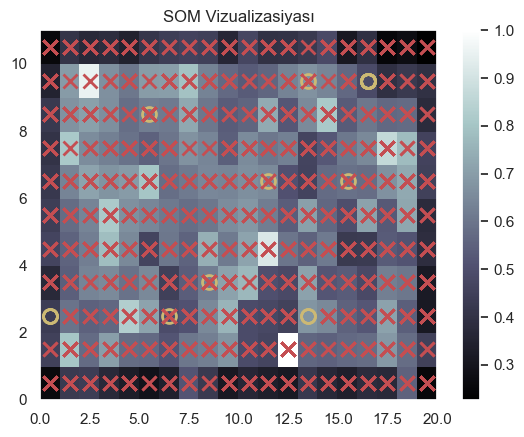

In [60]:
import matplotlib.pyplot as plt
from matplotlib.pylab import pcolor, colorbar, plot, bone

bone()
pcolor(som_opt.distance_map().T)  # Display the distance map
colorbar()

markers = ['x', 'o']  # x for rejected, o for accepted
colors = ['r', 'y']   # r for red, y for yellow

for i, x in enumerate(inputs_scaled2):
    w = som_opt.winner(x)
    label = int(y[i])  # float → int çevrilir
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[label],
         markeredgecolor=colors[label],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

plt.title("SOM Vizualizasiyası")
plt.show()


In [61]:
distance_map = som_opt.distance_map()

threshold = 0.9

white_nodes = [(i, j) for i in range(distance_map.shape[0]) for j in range(distance_map.shape[1]) if distance_map[i, j] >= threshold]

print("Positions of Nodes (Distance >= 0.9):")
for node in white_nodes:
    print(f"Node {node} - Distance: {distance_map[node[0], node[1]]:.2f}")


Positions of Nodes (Distance >= 0.9):
Node (2, 9) - Distance: 0.95
Node (11, 4) - Distance: 0.92
Node (12, 1) - Distance: 1.00


In [62]:
mappings = som_opt.win_map(inputs_scaled2)

complains = []

for node in white_nodes:
    if node in mappings:
        campaign_data = mappings[node]
        complains.append(campaign_data)

complains = np.concatenate(complains, axis=0)

complains = sc.inverse_transform(complains)

complains

array([[ 3.70000000e+01,  0.00000000e+00,  5.00000000e+00,
         1.83700000e+03,  0.00000000e+00,  0.00000000e+00,
         3.00000000e+01,  6.65000000e+02,  7.90000000e+01,
         4.21000000e+02,  9.90000000e+01,  8.00000000e+01,
         1.23000000e+02,  1.00000000e+00,  5.00000000e+00,
         1.00000000e+01,  6.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  8.00000000e+00,
         1.00000000e+00,  6.95282954e+00, -2.37863073e+00,
         2.93689380e+00,  1.90295157e+00, -1.84526020e+00,
         4.05460762e-02,  7.63823898e-01, -1.28944284e+00,
        -3.12194591e-01, -3.02549477e+00, -5.02194087e-01,
         5.96131014e-01],
       [ 3.00000000e+01,  2.00000000e+00,  5.00000000e+00,
         1.81300000e+03,  0.00000000e+00,  0.00000000e+00,
         4.30000000e+01,  5.60000000e+02,  7.30000000e+01,
         4.21000000e+02,  8.20000000e+01,  5.40000000e+01,
         1.23000000e+02,  1.00

In [63]:
comp_df = pd.DataFrame(complains, columns=inputs2.columns)

comp_df


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Segments,Segments_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12
0,37.0,0.0,5.0,1837.0,0.0,0.0,30.0,665.0,79.0,421.0,99.0,80.0,123.0,1.0,5.0,10.0,6.0,2.0,0.0,1.0,1.0,1.0,0.0,8.0,1.0,6.952830,-2.378631,2.936894,1.902952,-1.845260,0.040546,0.763824,-1.289443,-0.312195,-3.025495,-0.502194,0.596131
1,30.0,2.0,5.0,1813.0,0.0,0.0,43.0,560.0,73.0,421.0,82.0,54.0,123.0,1.0,5.0,6.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,7.0,1.0,5.571375,-1.641799,4.247357,2.495914,1.158884,2.895366,2.454845,-0.404102,-2.749727,5.231689,3.297583,0.746150
2,42.0,2.0,3.0,1374.0,0.0,0.0,23.0,716.0,0.0,69.0,0.0,0.0,46.0,1.0,10.0,4.0,13.0,6.0,1.0,0.0,1.0,1.0,1.0,7.0,1.0,3.037512,-0.028917,7.488909,4.119471,2.023775,1.518010,0.482771,-0.626006,-2.293259,3.284118,2.337321,-0.634976
3,46.0,2.0,3.0,1862.0,0.0,0.0,31.0,712.0,60.0,421.0,70.0,20.0,100.0,1.0,4.0,7.0,10.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,1.0,5.963486,-2.231553,6.266379,3.429711,1.952994,1.888998,0.575860,-0.245285,-2.805034,3.412203,3.949494,0.615824
4,50.0,3.0,4.0,1936.0,0.0,0.0,94.0,150.0,28.0,421.0,0.0,28.0,56.0,0.0,4.0,3.0,7.0,3.0,1.0,0.0,1.0,1.0,1.0,7.0,1.0,3.302841,-2.576145,7.001054,2.510024,1.261584,2.702811,1.208484,1.568703,-2.127202,3.368245,3.607282,0.343998
5,46.0,2.0,3.0,1579.0,1.0,0.0,93.0,527.0,78.0,364.0,48.0,80.0,92.0,2.0,8.0,4.0,8.0,4.0,1.0,0.0,1.0,0.0,0.0,8.0,1.0,4.017692,-1.545930,0.271160,3.260130,1.609663,1.258084,0.039372,2.374808,0.626257,-0.143385,-0.174400,1.939940
6,46.0,2.0,3.0,1579.0,1.0,0.0,93.0,527.0,78.0,364.0,48.0,80.0,92.0,2.0,8.0,4.0,8.0,4.0,1.0,0.0,1.0,0.0,0.0,8.0,1.0,4.017692,-1.545930,0.271160,3.260130,1.609663,1.258084,0.039372,2.374808,0.626257,-0.143385,-0.174400,1.939940
7,35.0,2.0,2.0,1868.0,0.0,0.0,78.0,650.0,79.0,350.0,99.0,80.0,27.0,0.0,4.0,7.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,8.0,1.0,5.692912,-3.318162,2.100530,1.480455,2.530214,1.397744,-1.070935,1.904017,-0.832242,-2.464060,0.610099,0.735867
8,35.0,2.0,2.0,1868.0,0.0,0.0,78.0,650.0,79.0,350.0,99.0,80.0,27.0,0.0,4.0,7.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,8.0,1.0,5.692912,-3.318162,2.100530,1.480455,2.530214,1.397744,-1.070935,1.904017,-0.832242,-2.464060,0.610099,0.735867
9,32.0,3.0,3.0,1858.0,0.0,0.0,80.0,680.0,79.0,421.0,99.0,42.0,123.0,1.0,5.0,7.0,10.0,2.0,1.0,0.0,1.0,1.0,0.0,8.0,1.0,6.390139,-1.954122,1.939242,1.953395,2.682578,1.683733,-0.095071,1.943740,-0.189395,-2.072978,0.384384,0.375621


## Deployment

In [126]:
common_cols = list(set(data_sample.columns) & set(comp_df.columns)) 

common_cols

['Education',
 'AcceptedCmp4',
 'AcceptedCmp2',
 'Kidhome',
 'Income',
 'MntFishProducts',
 'MntSweetProducts',
 'MntFruits',
 'Teenhome',
 'NumCatalogPurchases',
 'Marital_Status',
 'Year_Birth',
 'MntGoldProds',
 'NumStorePurchases',
 'AcceptedCmp3',
 'MntMeatProducts',
 'Recency',
 'AcceptedCmp5',
 'NumWebVisitsMonth',
 'NumDealsPurchases',
 'AcceptedCmp1',
 'MntWines',
 'NumWebPurchases']

In [128]:
data_sample = som_data.merge(data[common_cols].assign(iscomp=1), how="left", on=common_cols)

df1

C:\Users\admin\AppData\Local\Temp\ipykernel_16960\2273912350.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df1 = som_data.merge(comp_df[common_cols].assign(iscomp=1), how="left", on=common_cols)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments,Segments_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,iscomp
0,17,2,4,1171,0,0,58,517,79,413,99,80,87,3,8,10,4,7,0,0,0,0,0,0,0,1,4.215320,0.060492,-1.894727,1.034802,-0.309244,0.271041,0.607712,0.211897,0.146314,0.060517,0.392993,-1.961163,NaN
1,14,2,4,832,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,5,0,-2.567646,0.169495,0.118622,-1.316522,0.046793,0.367505,0.176451,-0.506945,-0.855203,-0.786755,0.749110,0.384375,NaN
2,25,2,5,1568,0,0,26,371,49,126,92,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1,2.273990,-0.335539,-0.990876,-0.371928,-0.281133,-0.227880,0.929836,-1.225799,0.358195,0.437591,-0.584285,-0.816041,NaN
3,44,2,5,241,1,0,26,11,4,20,9,3,5,2,2,0,4,6,0,0,0,0,0,0,1,0,-2.800127,-1.408293,0.050084,0.387335,-0.330197,-0.388241,0.987151,-0.878208,0.915771,0.139528,0.022050,0.257909,NaN
4,41,4,3,1174,1,0,94,161,43,117,42,27,15,5,5,3,6,5,0,0,0,0,0,0,3,2,-0.055402,0.209918,-0.668837,0.679652,-0.249906,-0.602217,-0.617941,1.974964,1.772441,0.525662,1.259367,0.147870,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,27,2,3,1254,0,1,46,551,43,177,38,80,123,2,9,3,4,5,0,0,0,0,0,0,0,2,2.452870,1.031305,-1.355989,0.841718,-0.026998,-0.219771,-0.253774,-0.049278,-0.839317,0.090373,-0.401581,-0.632271,NaN
2238,6,4,5,1340,2,1,56,356,0,30,0,0,8,6,8,2,5,7,0,0,0,1,0,0,3,2,-0.972979,3.137052,1.649055,0.453098,0.376736,0.504170,0.729324,0.330044,1.713205,-3.371421,2.944899,-1.251048,NaN
2239,41,2,2,1134,0,0,91,653,48,206,28,12,24,1,2,3,13,6,0,1,0,0,0,0,4,1,1.732966,-0.276719,1.580677,0.293806,-1.782735,-1.305459,-1.721511,1.302991,0.114964,1.174958,-2.369581,0.320230,NaN
2240,16,3,5,1492,0,1,8,372,30,203,70,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,2.458262,1.109218,-0.856987,-1.321771,0.518254,-0.005078,0.921321,-1.551185,0.025755,0.152677,0.182702,0.109267,NaN


In [130]:
df1["iscomp"].value_counts()

iscomp
1.0    4
Name: count, dtype: int64

In [132]:
df1["iscomp"] = np.where(df1["iscomp"].isna(),0,1)

df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments,Segments_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,iscomp
0,17,2,4,1171,0,0,58,517,79,413,99,80,87,3,8,10,4,7,0,0,0,0,0,0,0,1,4.215320,0.060492,-1.894727,1.034802,-0.309244,0.271041,0.607712,0.211897,0.146314,0.060517,0.392993,-1.961163,0
1,14,2,4,832,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,5,0,-2.567646,0.169495,0.118622,-1.316522,0.046793,0.367505,0.176451,-0.506945,-0.855203,-0.786755,0.749110,0.384375,0
2,25,2,5,1568,0,0,26,371,49,126,92,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1,2.273990,-0.335539,-0.990876,-0.371928,-0.281133,-0.227880,0.929836,-1.225799,0.358195,0.437591,-0.584285,-0.816041,0
3,44,2,5,241,1,0,26,11,4,20,9,3,5,2,2,0,4,6,0,0,0,0,0,0,1,0,-2.800127,-1.408293,0.050084,0.387335,-0.330197,-0.388241,0.987151,-0.878208,0.915771,0.139528,0.022050,0.257909,0
4,41,4,3,1174,1,0,94,161,43,117,42,27,15,5,5,3,6,5,0,0,0,0,0,0,3,2,-0.055402,0.209918,-0.668837,0.679652,-0.249906,-0.602217,-0.617941,1.974964,1.772441,0.525662,1.259367,0.147870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,27,2,3,1254,0,1,46,551,43,177,38,80,123,2,9,3,4,5,0,0,0,0,0,0,0,2,2.452870,1.031305,-1.355989,0.841718,-0.026998,-0.219771,-0.253774,-0.049278,-0.839317,0.090373,-0.401581,-0.632271,0
2238,6,4,5,1340,2,1,56,356,0,30,0,0,8,6,8,2,5,7,0,0,0,1,0,0,3,2,-0.972979,3.137052,1.649055,0.453098,0.376736,0.504170,0.729324,0.330044,1.713205,-3.371421,2.944899,-1.251048,0
2239,41,2,2,1134,0,0,91,653,48,206,28,12,24,1,2,3,13,6,0,1,0,0,0,0,4,1,1.732966,-0.276719,1.580677,0.293806,-1.782735,-1.305459,-1.721511,1.302991,0.114964,1.174958,-2.369581,0.320230,0
2240,16,3,5,1492,0,1,8,372,30,203,70,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,2.458262,1.109218,-0.856987,-1.321771,0.518254,-0.005078,0.921321,-1.551185,0.025755,0.152677,0.182702,0.109267,0


In [134]:
targets3 = df1['iscomp']

inputs3 = df1.drop(['iscomp'],axis=1)

In [138]:
targets3.value_counts()


iscomp
0    2238
1       4
Name: count, dtype: int64

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs3)

scaled = scaler.transform(inputs3)

inputs_scaled = pd.DataFrame(scaled, columns=inputs3.columns)

inputs_scaled

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Segments,Segments_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12
0,-1.011597,-0.349966,0.251670,0.334611,-0.826115,-0.929121,0.305511,1.182275,2.154234,2.039217,2.126099,2.136087,1.231479,0.510236,1.486221,2.698125,-0.551524,0.735818,-0.281854,-0.283693,-0.281854,-0.261986,-0.116458,-0.097238,-1.358890,0.220927,1.549493,0.042212,-1.443538,0.869467,-0.297432,0.266942,0.607234,0.211103,0.152273,0.067122,0.472847,-2.475916
1,-1.267070,-0.349966,0.251670,-0.260605,1.031608,0.907819,-0.384794,-0.977199,-0.765313,-0.885391,-0.762458,-0.764155,-0.848691,-0.140105,-1.157110,-0.594651,-1.167012,-0.124747,-0.281854,-0.283693,-0.281854,-0.261986,-0.116458,-0.097238,0.754185,-0.984227,-0.945953,0.116581,0.090179,-1.111743,0.043423,0.362342,0.176288,-0.512276,-0.894029,-0.870652,0.901155,0.482653
2,-0.330337,-0.349966,1.181230,1.031663,-0.826115,-0.929121,-0.798977,0.559185,1.031331,-0.023099,1.917646,-0.029916,0.075829,-0.790446,1.486221,-0.228787,1.294941,-0.555030,-0.281854,-0.283693,-0.281854,-0.261986,-0.116458,-0.097238,-1.358890,0.220927,0.835280,-0.227985,-0.755008,-0.315834,-0.270521,-0.226477,0.929124,-1.235667,0.373628,0.484475,-0.702543,-1.031505
3,1.287657,-0.349966,1.181230,-1.298282,1.031608,-0.929121,-0.798977,-0.977199,-0.653023,-0.784791,-0.554005,-0.690731,-0.874372,-0.140105,-0.779491,-0.960515,-0.551524,0.305535,-0.281854,-0.283693,-0.281854,-0.261986,-0.116458,-0.097238,-0.936275,-0.984227,-1.031482,-0.959888,0.037968,0.323916,-0.317492,-0.385069,0.986398,-0.885882,0.956138,0.154574,0.026707,0.323133
4,1.032184,1.429226,-0.677891,0.339879,1.031608,-0.929121,1.548059,-0.337039,0.806750,-0.087771,0.428700,0.190355,-0.617561,1.810918,0.353365,0.137077,0.063965,-0.124747,-0.281854,-0.283693,-0.281854,-0.261986,-0.116458,-0.097238,-0.091045,1.426081,-0.021701,0.144160,-0.509687,0.570220,-0.240624,-0.596685,-0.617526,1.985297,1.851117,0.581953,1.514850,0.184335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,-0.160022,-0.349966,-0.677891,0.480343,-0.826115,0.907819,-0.108672,1.327378,0.806750,0.343375,0.309584,2.136087,2.155998,-0.140105,1.863840,0.137077,-0.551524,-0.124747,-0.281854,-0.283693,-0.281854,-0.261986,-0.116458,-0.097238,-1.358890,1.426081,0.901090,0.704564,-1.033141,0.706776,-0.027221,-0.218457,-0.253624,-0.051721,-0.877433,0.100168,-0.482802,-0.799705
2238,-1.948330,1.429226,1.181230,0.631341,2.889330,0.907819,0.236480,0.495169,-0.802744,-0.712933,-0.822015,-0.800867,-0.797328,2.461259,1.486221,-0.228787,-0.243780,0.735818,-0.281854,-0.283693,-0.281854,3.816994,-0.116458,-0.097238,-0.091045,1.426081,-0.359276,2.141242,1.256023,0.379327,0.359298,0.497499,0.728758,0.329995,1.789231,-3.731405,3.542069,-1.580205
2239,1.032184,-0.349966,-1.607451,0.269647,-0.826115,-0.929121,1.444513,1.762687,0.993901,0.551763,0.011795,-0.360324,-0.386431,-0.790446,-0.779491,0.137077,2.218174,0.305535,-0.281854,3.524933,-0.281854,-0.261986,-0.116458,-0.097238,0.331570,0.220927,0.636238,-0.187855,1.203934,0.245108,-1.708093,-1.292171,-1.720293,1.309083,0.119521,1.300605,-2.849750,0.401742
2240,-1.096755,0.539630,1.181230,0.898223,-0.826115,0.907819,-1.420251,0.563453,0.320159,0.530205,1.262510,0.300491,0.563770,-0.140105,0.730984,0.868805,1.294941,-0.985313,-0.281854,-0.283693,-0.281854,-0.261986,-0.116458,-0.097238,-1.358890,0.220927,0.903073,0.757722,-0.653015,-1.116166,0.494780,-0.006132,0.920614,-1.563107,0.026323,0.169127,0.219926,0.135643


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets3, test_size=0.2, stratify=targets3, random_state=42)

In [144]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam
from sklearn.metrics import roc_auc_score

In [145]:
from tensorflow.keras.layers import Dense, Dropout

def create_model(trial):
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)

    model = Sequential()
    model.add(Dense(units=trial.suggest_int('units_layer1', 6, 32), activation='relu'))
    model.add(Dropout(dropout_rate))  
    model.add(Dense(units=trial.suggest_int('units_layer2', 6, 32), activation='relu'))
    model.add(Dropout(dropout_rate))  
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    return model


In [166]:
def optimal(trial):
    
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)
    
    model = create_model(trial)
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(optimal, n_trials=10)

print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")

[I 2025-11-21 13:46:26,924] A new study created in memory with name: no-name-833063ed-3524-45be-af48-ed71b9b54dac


Epoch 1/36


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7723 - loss: 0.8643  
Epoch 2/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7093 - loss: 0.8755  
Epoch 3/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6217 - loss: 0.8584 
Epoch 4/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8449 - loss: 0.8666 
Epoch 5/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6826 - loss: 0.8529  
Epoch 6/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.3855 - loss: 0.8564  
Epoch 7/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7143 - loss: 0.8510 
Epoch 8/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.5495 - loss: 0.8613
Epoch 9/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6517 - loss: 0.8623  
Epoch 10/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5590 - loss: 0.8450
Epoch 11/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6304 - loss: 0.8533  
Epoch 12/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6412 - loss: 0.8587  
Epoch 13/36
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5

[I 2025-11-21 13:46:41,587] Trial 0 finished with value: 0.6116071428571429 and parameters: {'epochs': 36, 'batch_size': 35, 'dropout_rate': 0.11458322994723265, 'units_layer1': 19, 'units_layer2': 23, 'optimizer': 'adagrad', 'learning_rate': 2.3607587643724723e-05}. Best is trial 0 with value: 0.6116071428571429.


Epoch 1/25


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.4171 - loss: 0.1557  
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.5696 - loss: 0.0355 
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.4670 - loss: 0.0315     
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9830 - loss: 0.0125
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8054 - loss: 0.0178  
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9850 - loss: 0.0102  
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9912 - loss: 0.0070    
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9959 - loss: 0.0044     
Epoch 9/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - loss: 0.0020     
Epoch 10/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 1.0000 - loss: 9.1633e-04
Epoch 11/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9998 - loss: 0.0026 
Epoch 12/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9980 - loss: 0.0033      
Epoch 13/25
72/72 ━━━━━

[I 2025-11-21 13:46:54,581] Trial 1 finished with value: 1.0 and parameters: {'epochs': 25, 'batch_size': 25, 'dropout_rate': 0.2878908541896717, 'units_layer1': 24, 'units_layer2': 8, 'optimizer': 'rmsprop', 'learning_rate': 0.004712622119286575}. Best is trial 1 with value: 1.0.


Epoch 1/23


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7629 - loss: 0.4777   
Epoch 2/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9592 - loss: 0.4679    
Epoch 3/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6885 - loss: 0.4852   
Epoch 4/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.9123 - loss: 0.4674   
Epoch 5/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8462 - loss: 0.4622    
Epoch 6/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6820 - loss: 0.4593   
Epoch 7/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7836 - loss: 0.4539    
Epoch 8/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7756 - loss: 0.4532
Epoch 9/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7599 - loss: 0.4471   
Epoch 10/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8844 - loss: 0.4508    
Epoch 11/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.9453 - loss: 0.4449    
Epoch 12/23
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7167 - loss: 0.4460   
Epoch 13/23
31/31 ━━━━

[I 2025-11-21 13:47:04,294] Trial 2 finished with value: 0.9642857142857143 and parameters: {'epochs': 23, 'batch_size': 58, 'dropout_rate': 0.18744505509593729, 'units_layer1': 12, 'units_layer2': 9, 'optimizer': 'adam', 'learning_rate': 1.0364756138255612e-05}. Best is trial 1 with value: 1.0.


Epoch 1/25


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.9352 - loss: 0.6546   
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9253 - loss: 0.6468   
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7691 - loss: 0.6441   
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9556 - loss: 0.6246   
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7580 - loss: 0.6129   
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8010 - loss: 0.6055   
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7922 - loss: 0.5941   
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7850 - loss: 0.5838    
Epoch 9/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9779 - loss: 0.5738    
Epoch 10/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7857 - loss: 0.5597   
Epoch 11/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8872 - loss: 0.5552   
Epoch 12/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8343 - loss: 0.5491
Epoch 13/25
34/34 ━━━━━━━

[I 2025-11-21 13:47:13,520] Trial 3 finished with value: 0.9799107142857144 and parameters: {'epochs': 25, 'batch_size': 53, 'dropout_rate': 0.13522544142929008, 'units_layer1': 26, 'units_layer2': 10, 'optimizer': 'adam', 'learning_rate': 2.5118948480394616e-05}. Best is trial 1 with value: 1.0.


Epoch 1/15


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.2783 - loss: 0.9160  
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.4256 - loss: 0.8312   
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5630 - loss: 0.8518   
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.2813 - loss: 0.8130  
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.1860 - loss: 0.7552   
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.2429 - loss: 0.7996   
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.2664 - loss: 0.7872    
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.0439 - loss: 0.7714    
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.1311 - loss: 0.7380    
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.3188 - loss: 0.7403   
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.2374 - loss: 0.7227   
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.3896 - loss: 0.6728  
Epoch 13/15
42/42 ━━━━━━

[I 2025-11-21 13:47:20,877] Trial 4 finished with value: 0.0267857142857143 and parameters: {'epochs': 15, 'batch_size': 43, 'dropout_rate': 0.4991279164110308, 'units_layer1': 19, 'units_layer2': 25, 'optimizer': 'adagrad', 'learning_rate': 0.00031921477703096985}. Best is trial 1 with value: 1.0.


Epoch 1/12


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.3392 - loss: 0.4125
Epoch 2/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7363 - loss: 0.2884
Epoch 3/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7886 - loss: 0.1912
Epoch 4/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7898 - loss: 0.1135
Epoch 5/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8794 - loss: 0.0752
Epoch 6/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.5585 - loss: 0.0512
Epoch 7/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7501 - loss: 0.0362
Epoch 8/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9439 - loss: 0.0254
Epoch 9/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.5025 - loss: 0.0239
Epoch 10/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9318 - loss: 0.0168
Epoch 11/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7934 - loss: 0.0146
Epoch 12/12
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7855 - loss: 0.0131 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-11-21 13:47:29,347] Trial 5 finished with value: 0.9977678571428571 and parameters: {'epochs': 12, 'batch_size': 19, 'dropout_rate': 0.2382960525943071, 'units_layer1': 22, 'units_layer2': 9, 'optimizer': 'rmsprop', 'learning_rate': 0.00023199237733819868}. Best is trial 1 with value: 1.0.


Epoch 1/16


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.2880 - loss: 0.1970   
Epoch 2/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.3894 - loss: 0.0222   
Epoch 3/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9856 - loss: 0.0081    
Epoch 4/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9899 - loss: 0.0062   
Epoch 5/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9993 - loss: 0.0034    
Epoch 6/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9988 - loss: 0.0043
Epoch 7/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9998 - loss: 0.0031
Epoch 8/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9990 - loss: 0.0039        
Epoch 9/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9991 - loss: 0.0039        
Epoch 10/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 1.0000 - loss: 0.0017   
Epoch 11/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9976 - loss: 0.0062        
Epoch 12/16
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 1.0000 - loss: 0.0011       
Epoch 13/

[I 2025-11-21 13:47:37,248] Trial 6 finished with value: 1.0 and parameters: {'epochs': 16, 'batch_size': 53, 'dropout_rate': 0.3116033609888167, 'units_layer1': 12, 'units_layer2': 25, 'optimizer': 'rmsprop', 'learning_rate': 0.007125984852078548}. Best is trial 1 with value: 1.0.


Epoch 1/36


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.3754 - loss: 0.1458 
Epoch 2/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6173 - loss: 0.0230
Epoch 3/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6455 - loss: 0.0147    
Epoch 4/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8200 - loss: 0.0101    
Epoch 5/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8291 - loss: 0.0072    
Epoch 6/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9989 - loss: 0.0040    
Epoch 7/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8315 - loss: 0.0058
Epoch 8/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9996 - loss: 0.0035      
Epoch 9/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9996 - loss: 0.0045      
Epoch 10/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9996 - loss: 0.0026    
Epoch 11/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9981 - loss: 0.0041     
Epoch 12/36
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - loss: 0.0034     
Epoch 13/36
78/78

[I 2025-11-21 13:47:54,185] Trial 7 finished with value: 0.9999999999999999 and parameters: {'epochs': 36, 'batch_size': 23, 'dropout_rate': 0.4240802118972701, 'units_layer1': 28, 'units_layer2': 22, 'optimizer': 'rmsprop', 'learning_rate': 0.0030426866176820762}. Best is trial 1 with value: 1.0.


Epoch 1/28


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7550 - loss: 0.0738
Epoch 2/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8062 - loss: 0.0097   
Epoch 3/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9993 - loss: 0.0052    
Epoch 4/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 0.0033 
Epoch 5/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 1.0000 - loss: 0.0027
Epoch 6/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 0.0024 
Epoch 7/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 0.0024   
Epoch 8/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 0.0022    
Epoch 9/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9998 - loss: 0.0025  
Epoch 10/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 0.0018   
Epoch 11/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 0.0017
Epoch 12/28
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9998 - loss: 0.0025  
Epoch 13/28
1

[I 2025-11-21 13:48:14,394] Trial 8 finished with value: 0.9999999999999999 and parameters: {'epochs': 28, 'batch_size': 16, 'dropout_rate': 0.31115579307519026, 'units_layer1': 24, 'units_layer2': 27, 'optimizer': 'adam', 'learning_rate': 0.0022413380234278346}. Best is trial 1 with value: 1.0.


Epoch 1/42


C:\Users\admin\AppData\Local\Temp\ipykernel_16960\3594387667.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9266 - loss: 1.0327  
Epoch 2/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7986 - loss: 0.8677  
Epoch 3/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6127 - loss: 0.7344  
Epoch 4/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.4761 - loss: 0.6458  
Epoch 5/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7318 - loss: 0.5449  
Epoch 6/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.4133 - loss: 0.4825  
Epoch 7/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.4434 - loss: 0.4197  
Epoch 8/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.3858 - loss: 0.3688  
Epoch 9/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.4413 - loss: 0.3265  
Epoch 10/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5336 - loss: 0.2810 
Epoch 11/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.1989 - loss: 0.2499 
Epoch 12/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.2939 - loss: 0.2198 
Epoch 13/42
55/55 ━━━━━━━━━━━━━━━━━━━━ 

[I 2025-11-21 13:48:31,029] Trial 9 finished with value: 0.9598214285714286 and parameters: {'epochs': 42, 'batch_size': 33, 'dropout_rate': 0.433827331151201, 'units_layer1': 19, 'units_layer2': 12, 'optimizer': 'rmsprop', 'learning_rate': 0.00018869673878853734}. Best is trial 1 with value: 1.0.


Best trial: 1.0
Best hyperparameters: {'epochs': 25, 'batch_size': 25, 'dropout_rate': 0.2878908541896717, 'units_layer1': 24, 'units_layer2': 8, 'optimizer': 'rmsprop', 'learning_rate': 0.004712622119286575}


In [168]:
print("y_train:", np.unique(y_train, return_counts=True))
print("y_test :", np.unique(y_test, return_counts=True))

y_train: (array([0, 1]), array([1790,    3], dtype=int64))
y_test : (array([0, 1]), array([448,   1], dtype=int64))


In [171]:
best_params = study.best_trial.params

best_params

{'epochs': 25,
 'batch_size': 25,
 'dropout_rate': 0.2878908541896717,
 'units_layer1': 24,
 'units_layer2': 8,
 'optimizer': 'rmsprop',
 'learning_rate': 0.004712622119286575}

In [173]:
best_model = Sequential()
best_model.add(Dense(units=best_params['units_layer1'], activation='relu'))
best_model.add(Dense(units=best_params['units_layer2'], activation='relu'))
best_model.add(Dense(1, activation='sigmoid'))

In [175]:
if best_params['optimizer'] == 'adam':
    best_optimizer = Adam(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'sgd':
    best_optimizer = SGD(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'rmsprop':
    best_optimizer = RMSprop(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'adagrad':
    best_optimizer = Adagrad(learning_rate=best_params['learning_rate'])


In [177]:
best_model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=['AUC'])

In [179]:
def evaluate(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])
    
    '''Predictions and probabilities for the training set'''
    
    y_train_prob = model.predict(X_train)

    '''Predictions and probabilities for the test set'''
    
    y_test_prob = model.predict(X_test)

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
    
    })

    return results

In [181]:
evaluate(best_model, X_train, y_train, X_test, y_test)

Epoch 1/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6664 - loss: 0.1451  
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.9998 - loss: 0.0038
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 1.0000 - loss: 0.0020     
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 1.0000 - loss: 0.0010      
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 1.0000 - loss: 8.0014e-04  
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 1.0000 - loss: 5.0841e-04
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - loss: 1.6626e-04 
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 1.0000 - loss: 1.6316e-04  
Epoch 9/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 7.0858e-05  
Epoch 10/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - loss: 2.5570e-05  
Epoch 11/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 1.0000 - loss: 1.0080e-05   
Epoch 12/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 1.0000 - loss: 5.5

,Dataset,Gini
0,Train,100.0
1,Test,100.0
